<a href="https://colab.research.google.com/github/annuhsans/EDA/blob/main/Case_study_Optimizing_Smartphone_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

In [ ]:
! pip install sweetviz

Reading dataset

In [ ]:
import pandas as pd
phone = pd.read_csv('/content/train (1).csv')

In [ ]:
# Separating X and y
X = phone.drop('price_range', axis=1)
y = phone['price_range']

In [ ]:
X

Analyse Dataset

In [ ]:
phone

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(phone)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



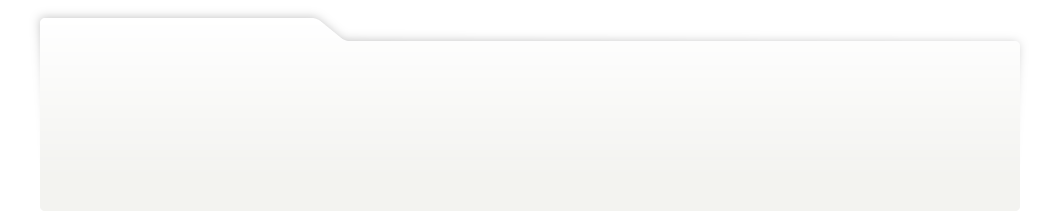
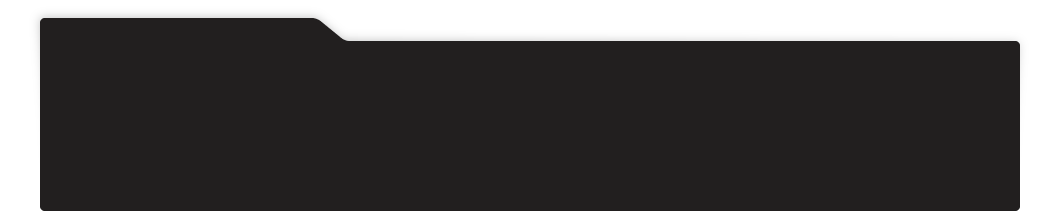
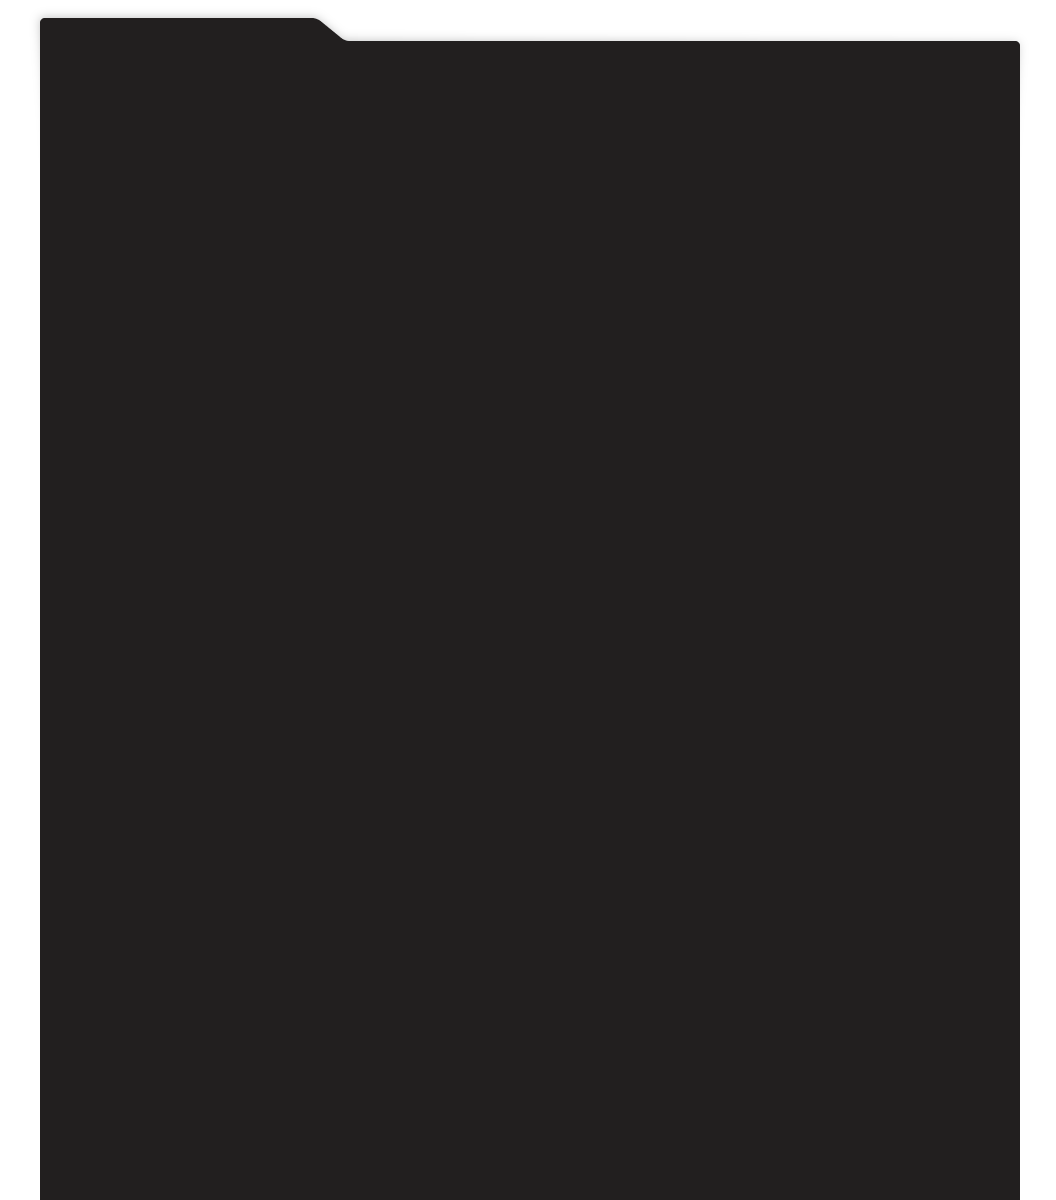
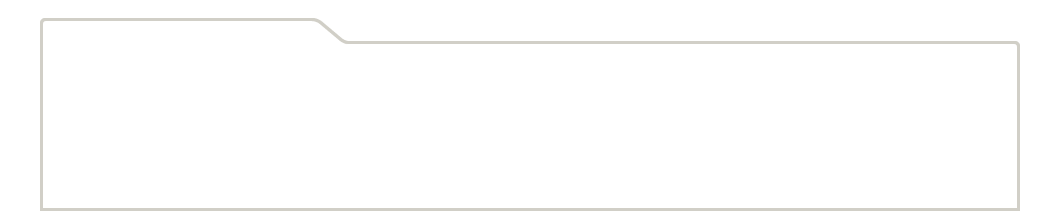
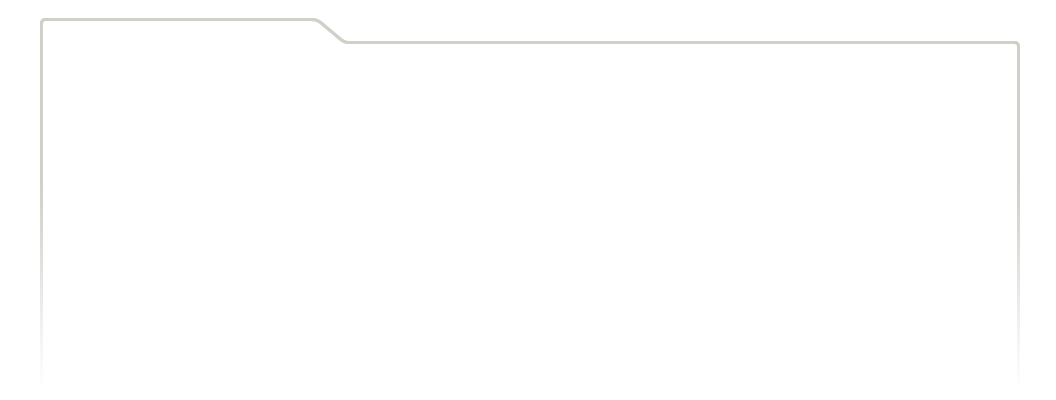
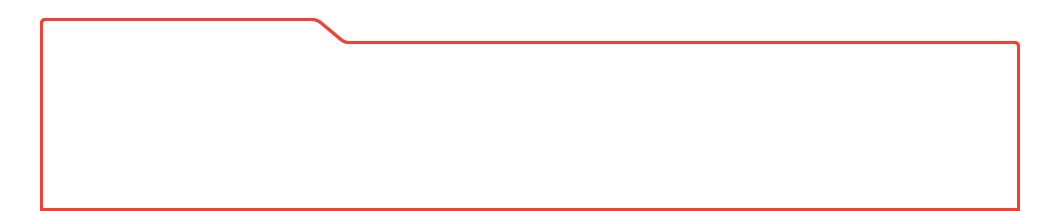
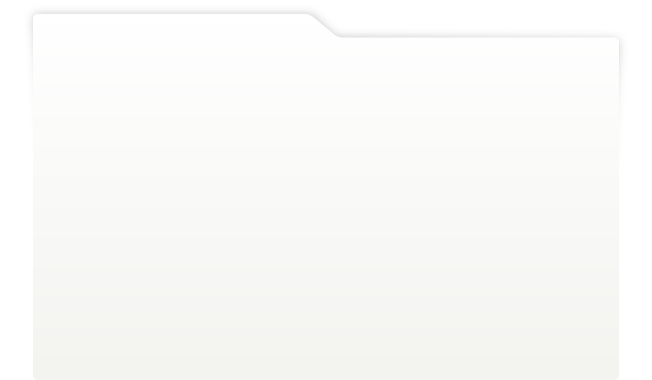
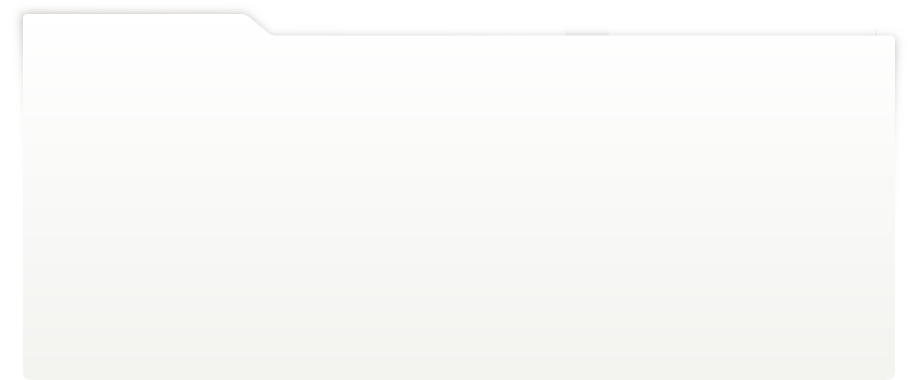
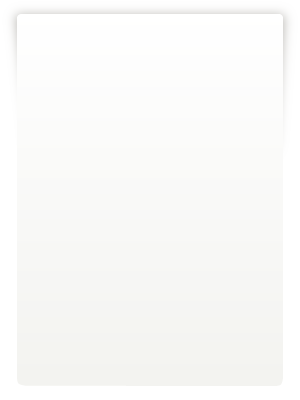
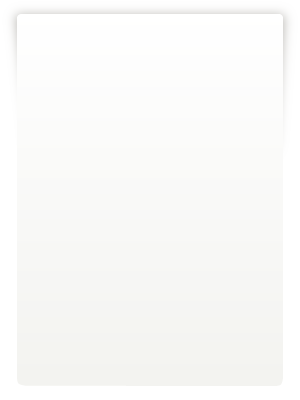
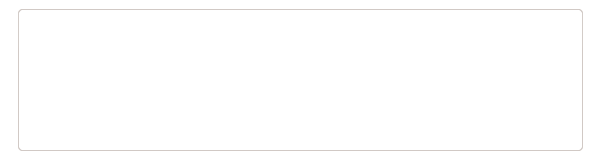
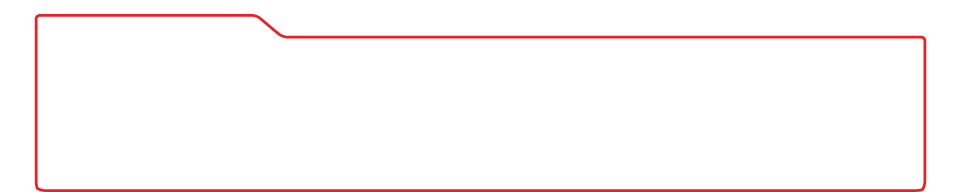
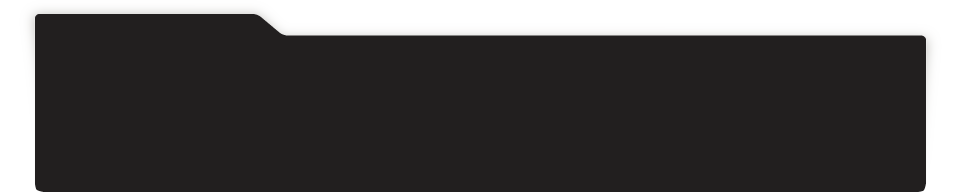
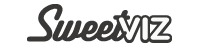
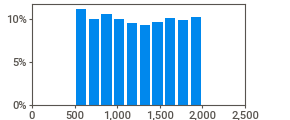
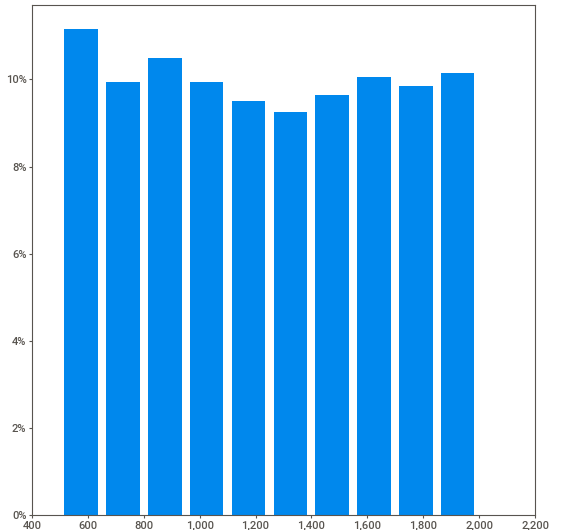
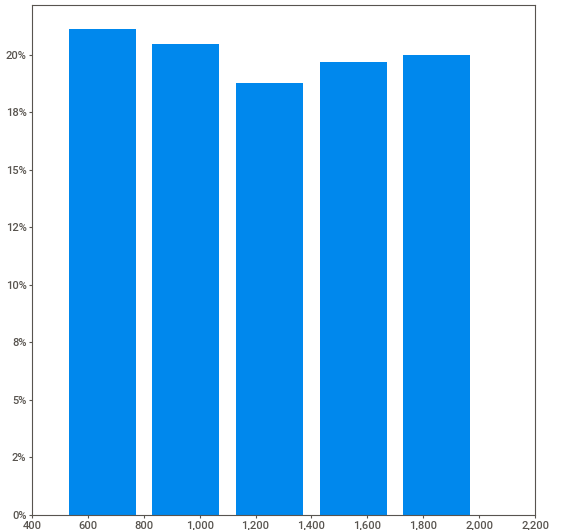
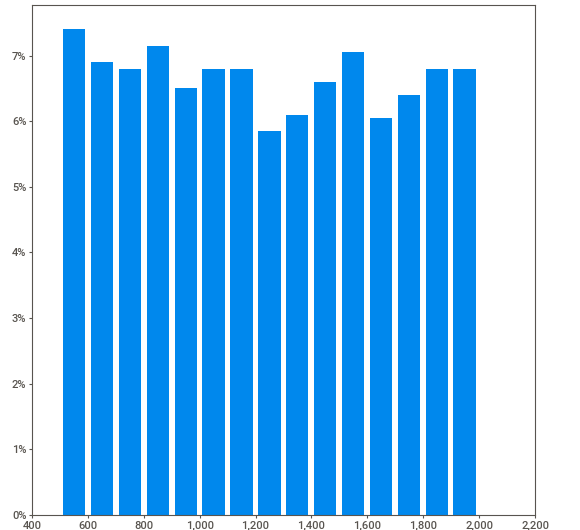
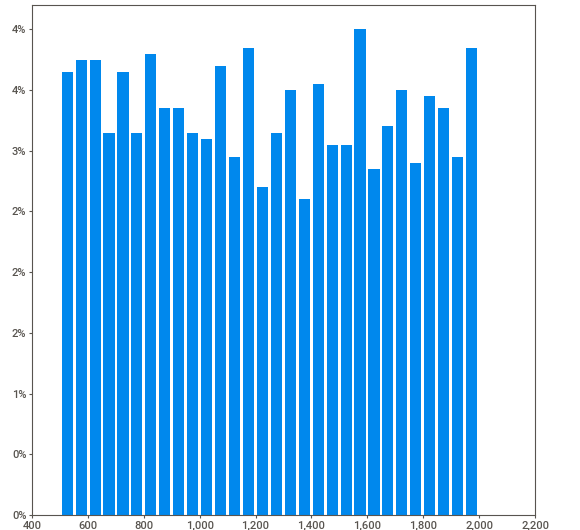
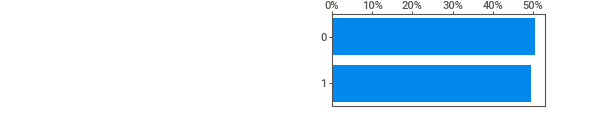
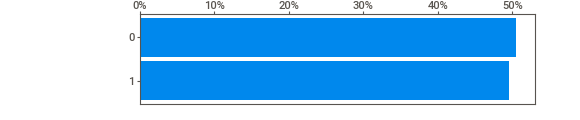
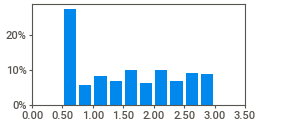
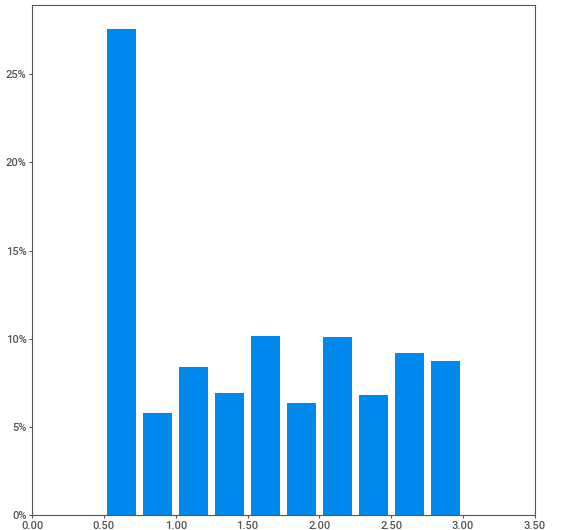
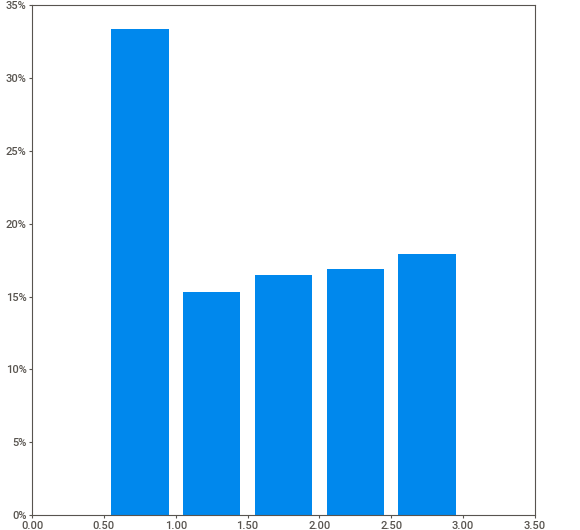
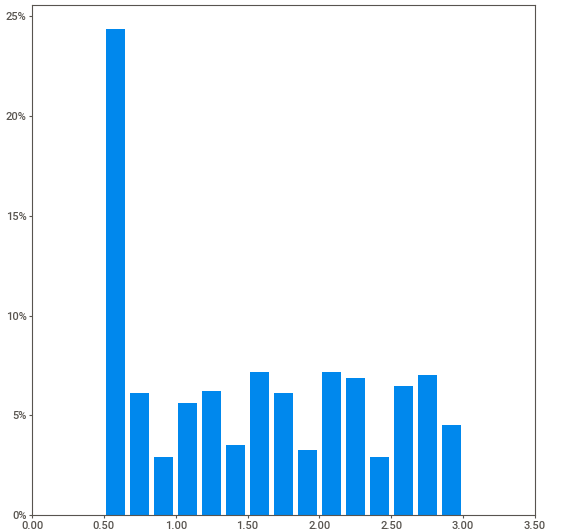
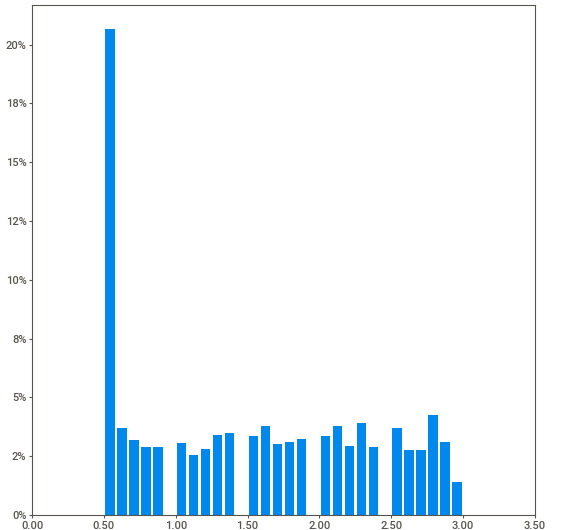
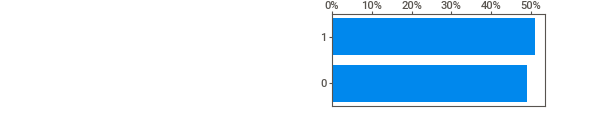
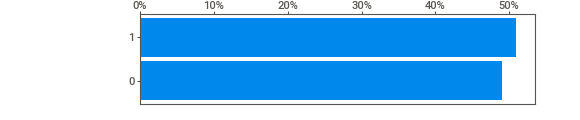
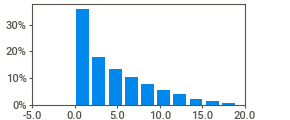
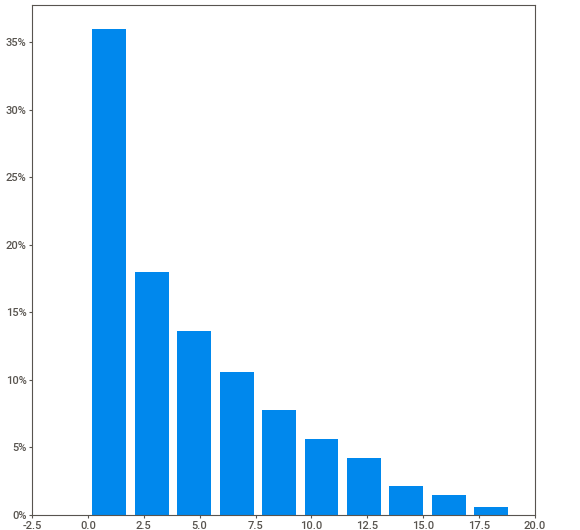
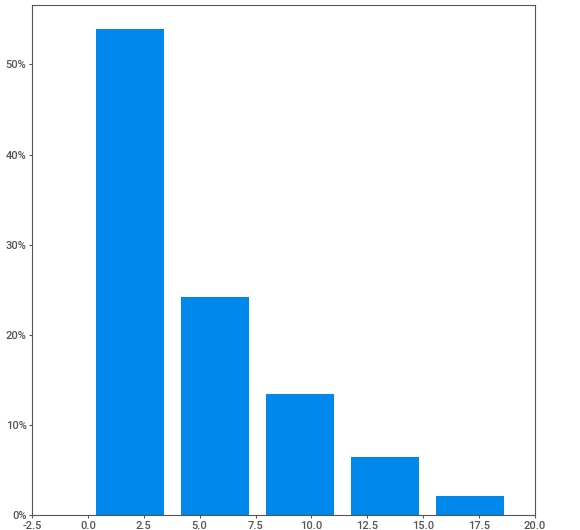
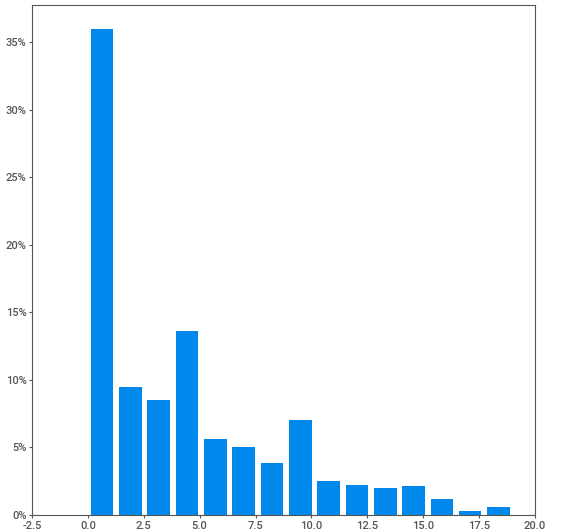
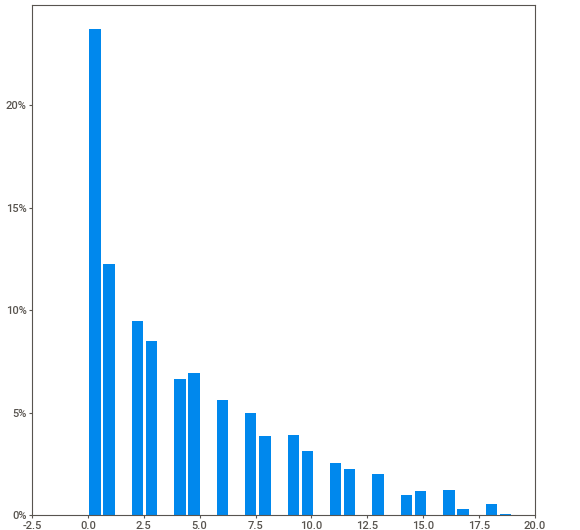
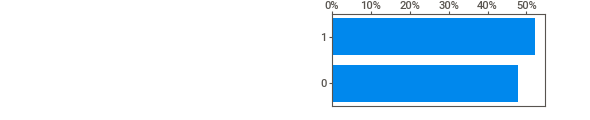
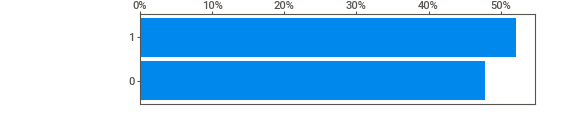
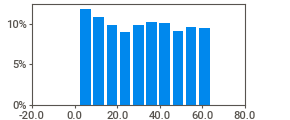
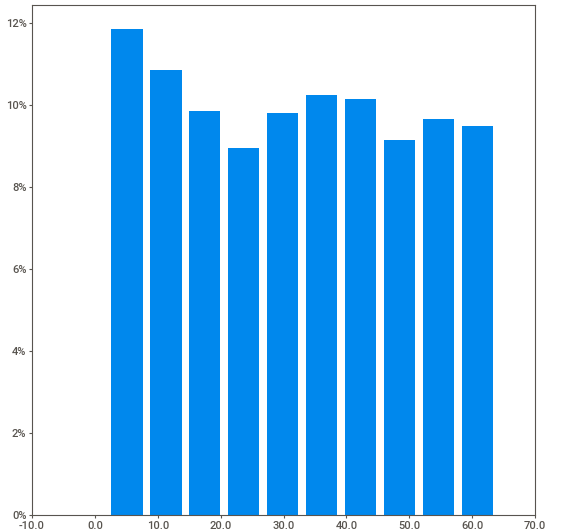
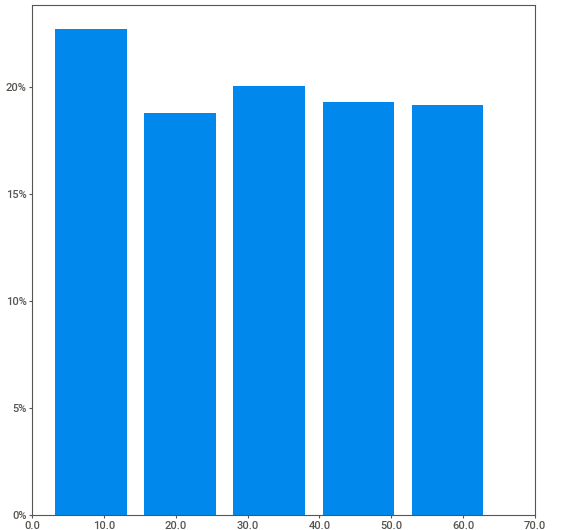
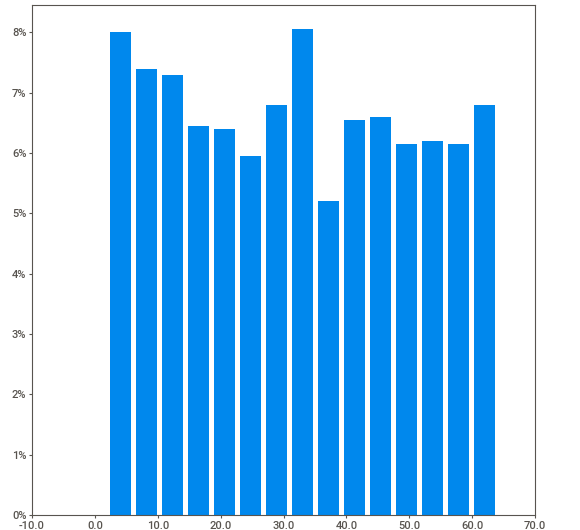
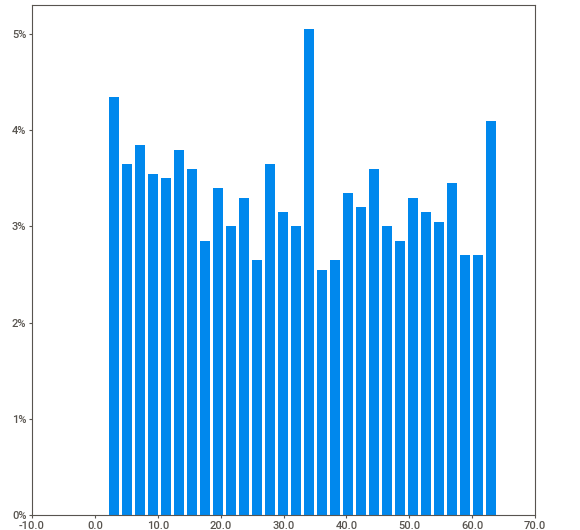
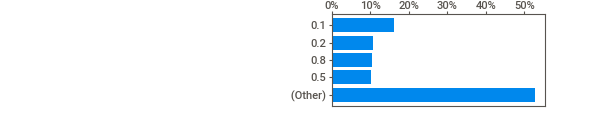
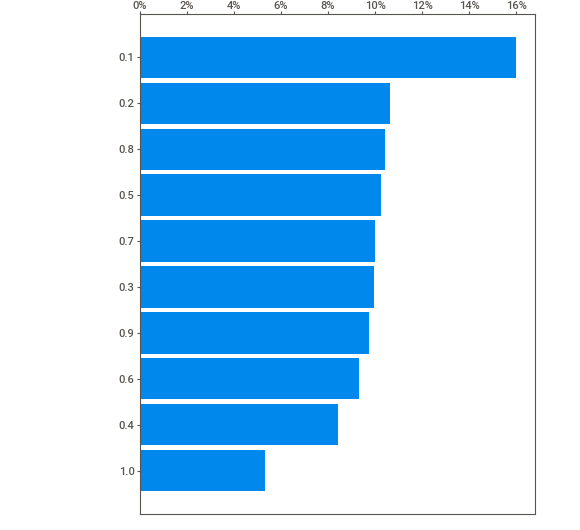
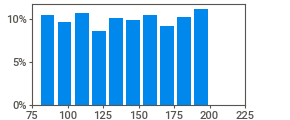
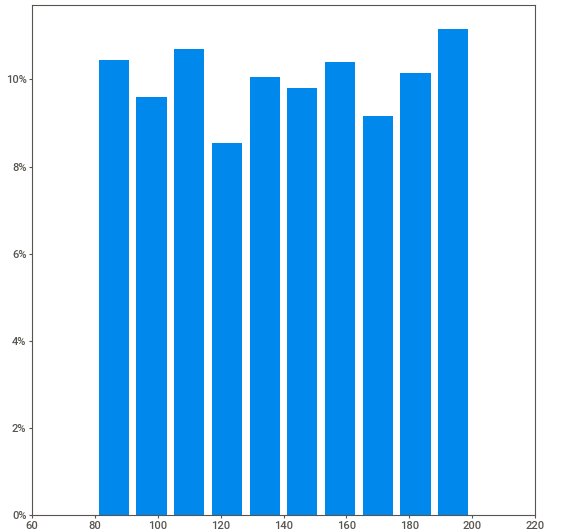
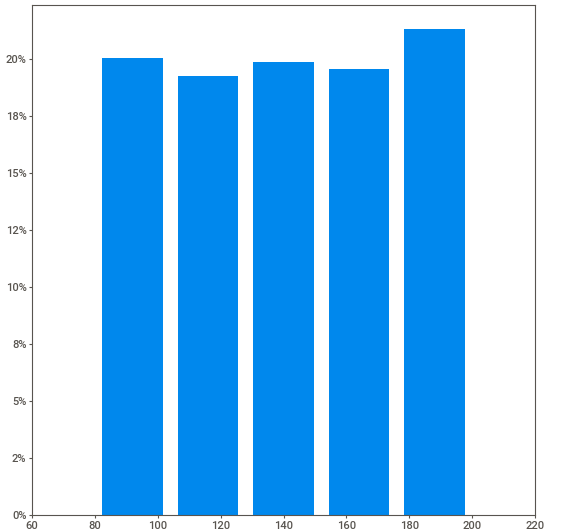
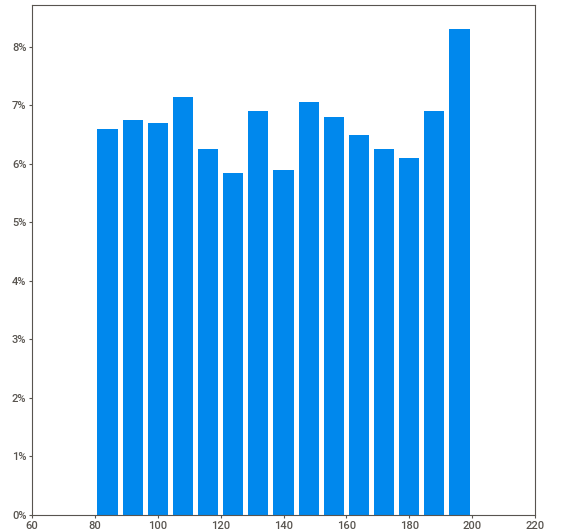
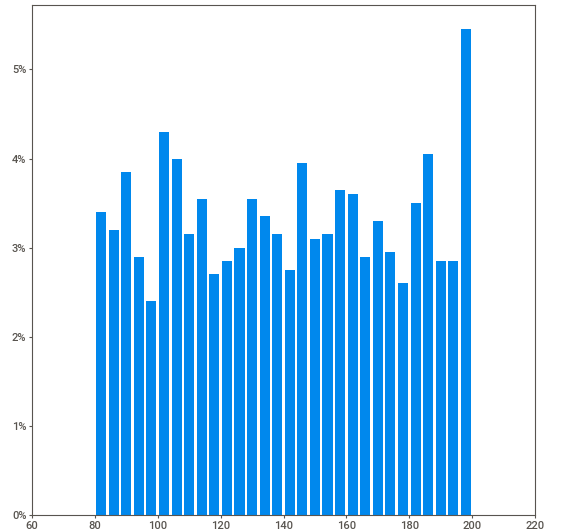
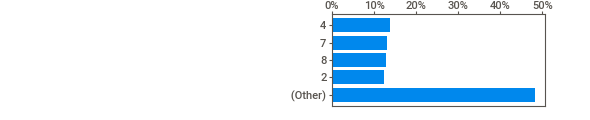
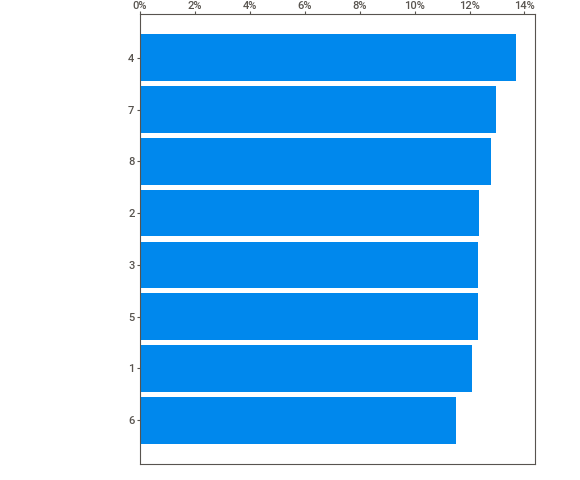
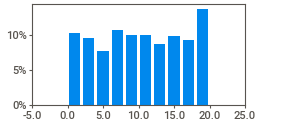
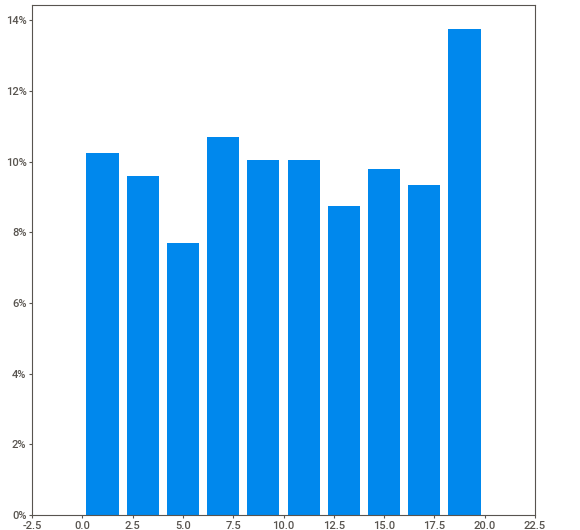
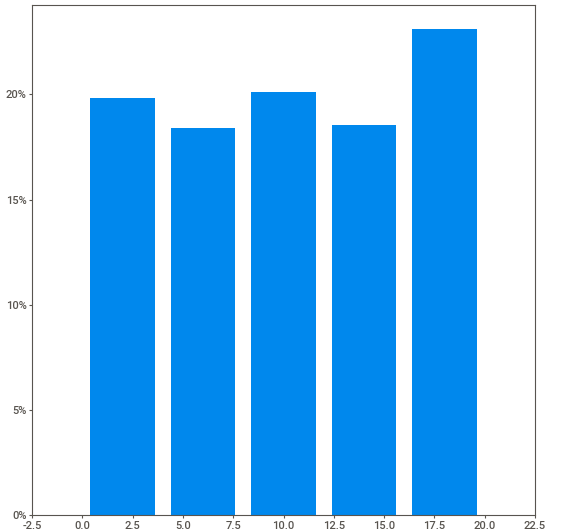
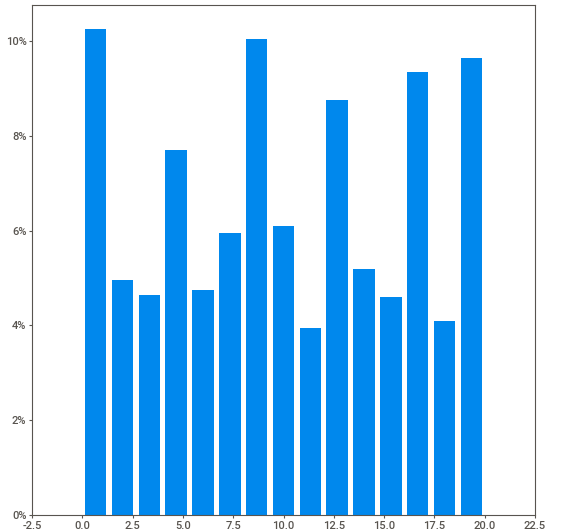
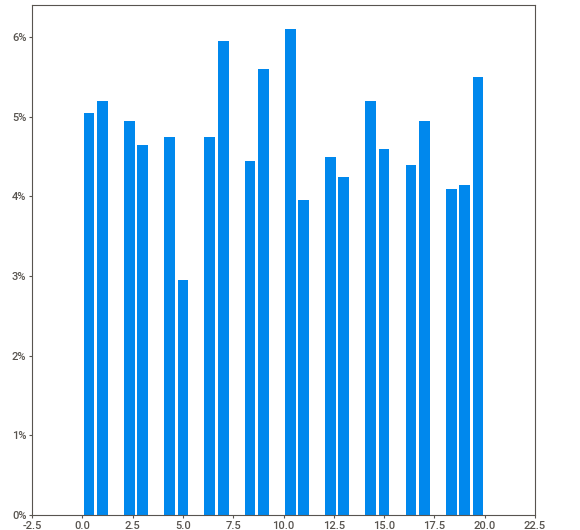
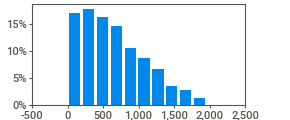
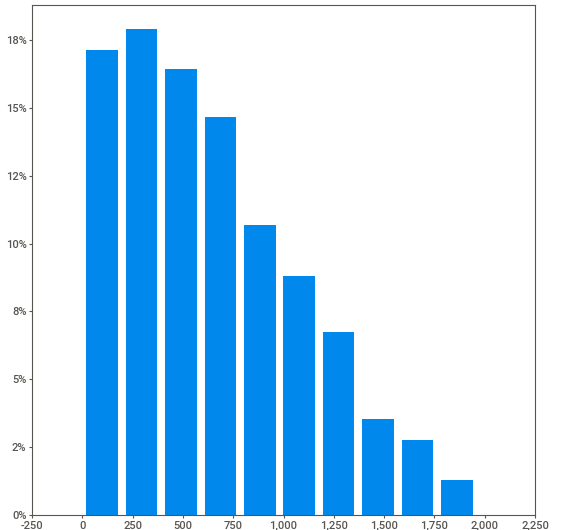
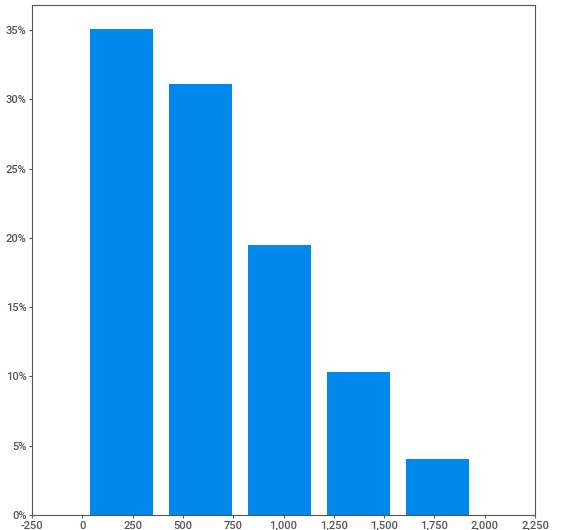
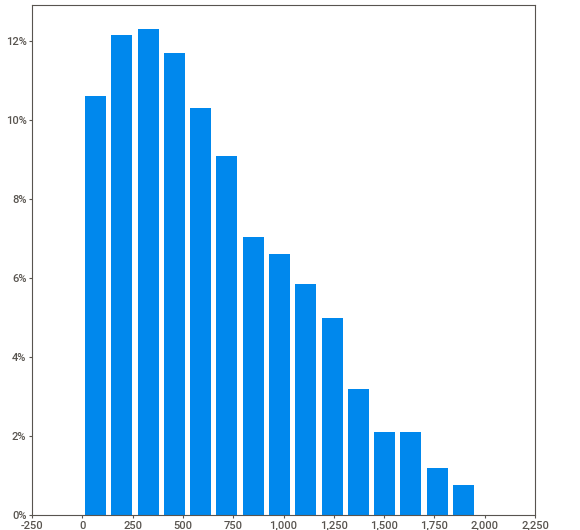
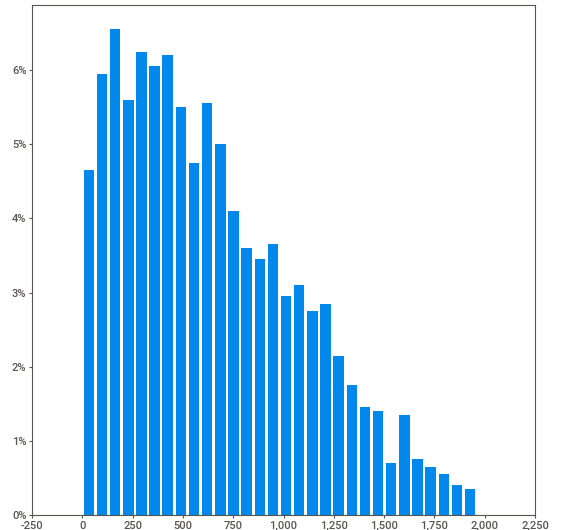
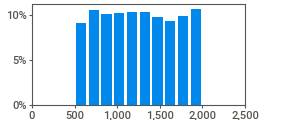
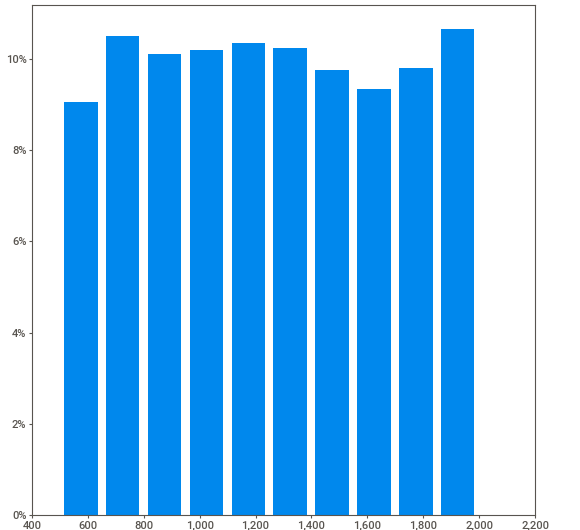
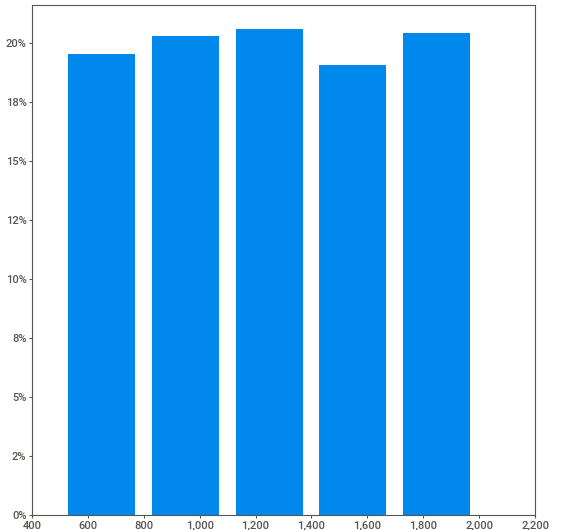
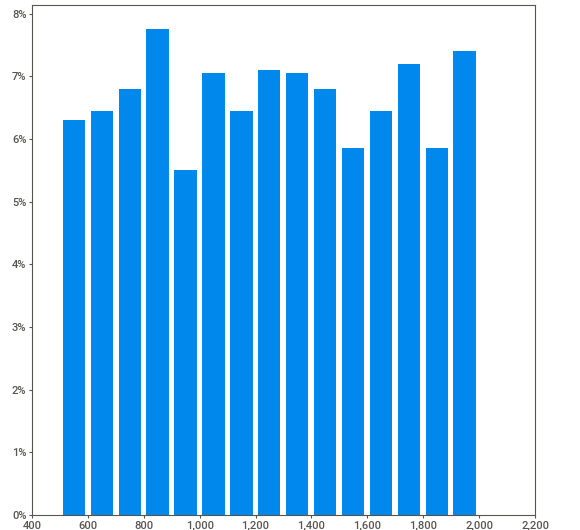
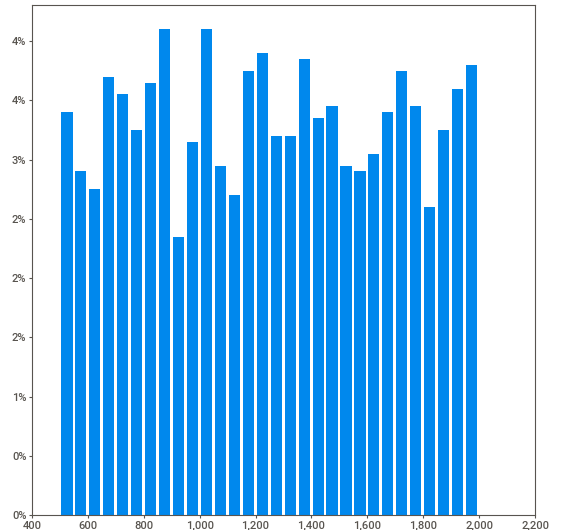
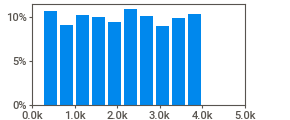
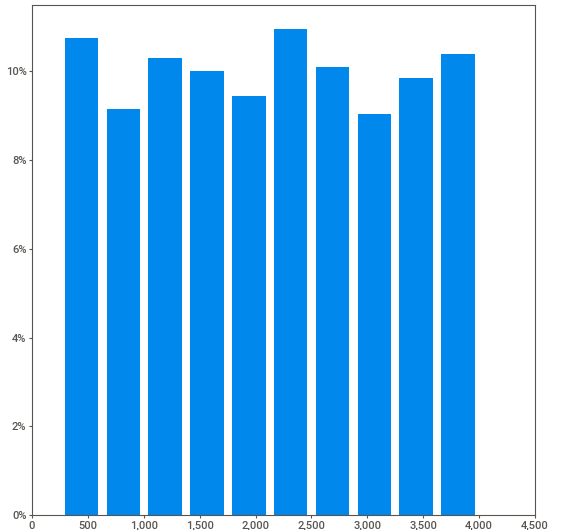
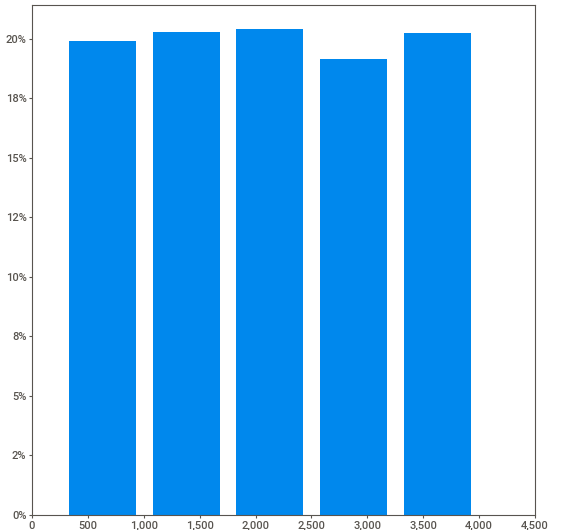
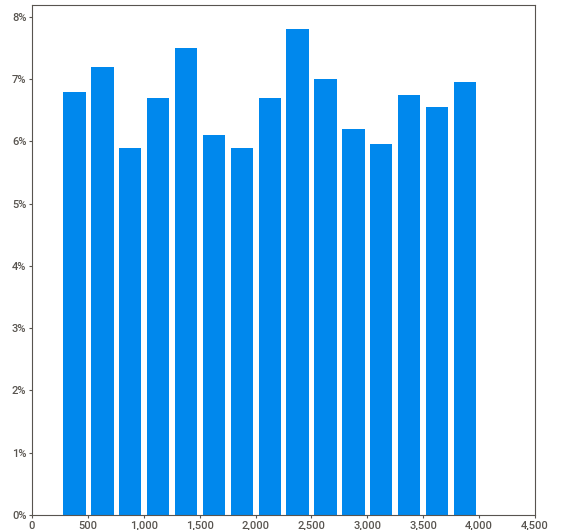
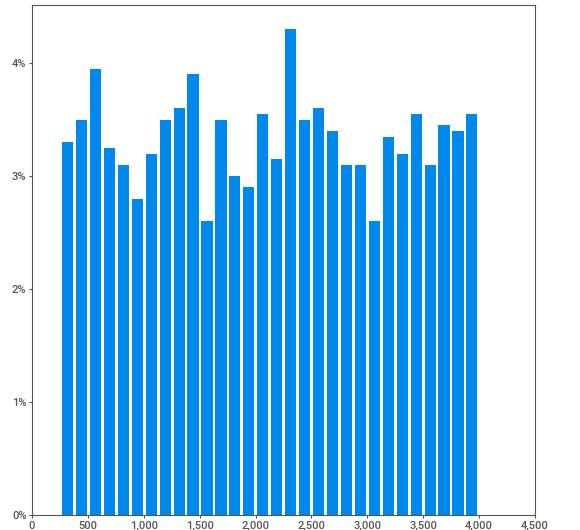
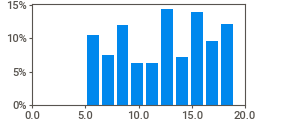
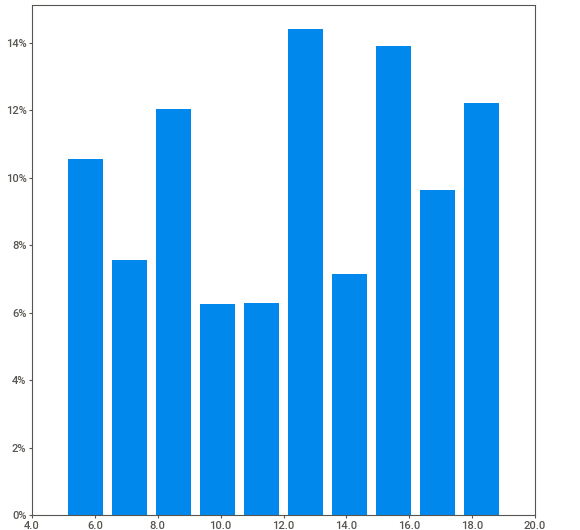
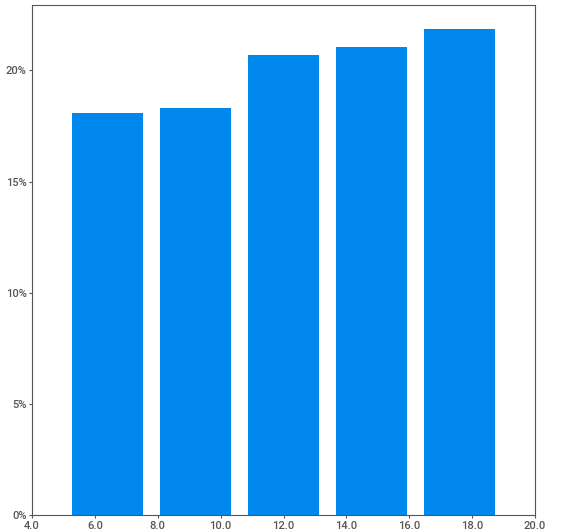
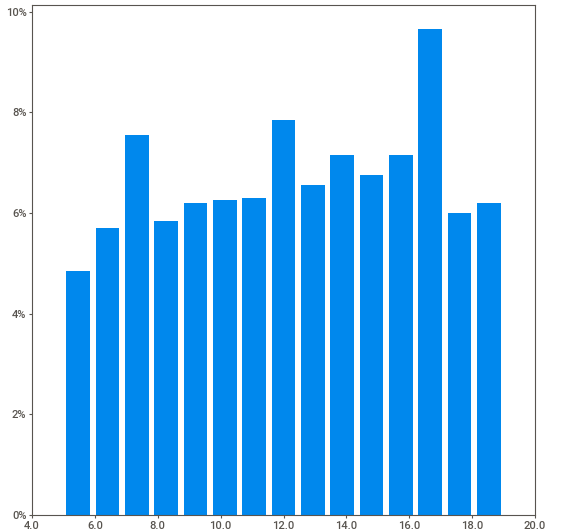
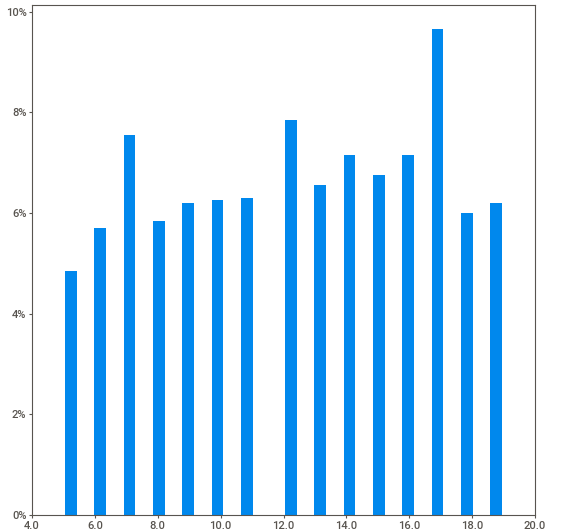
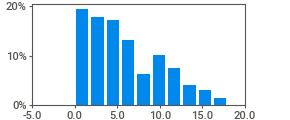
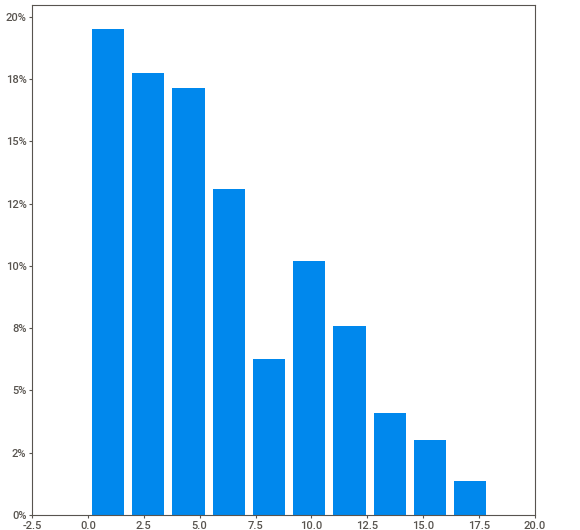
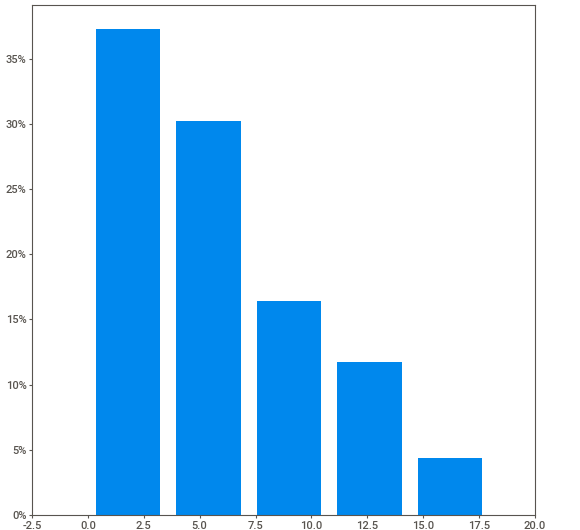
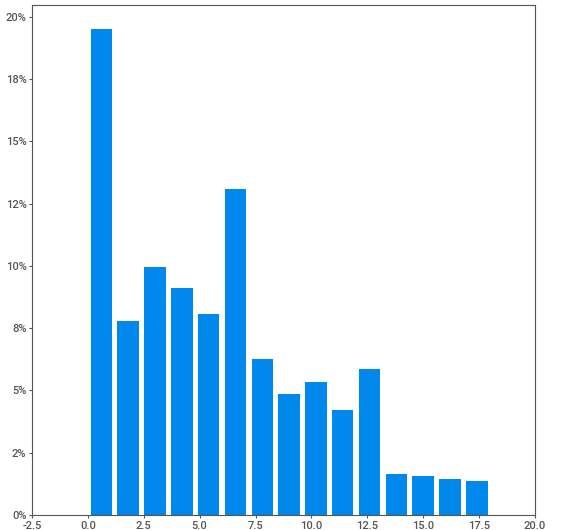
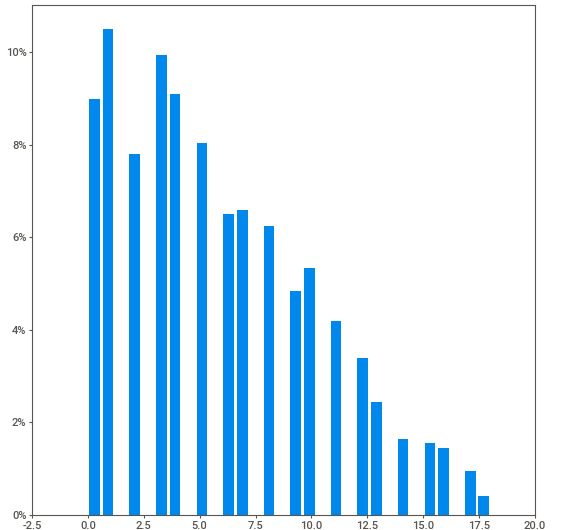
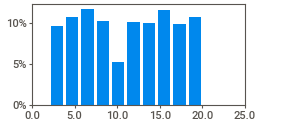
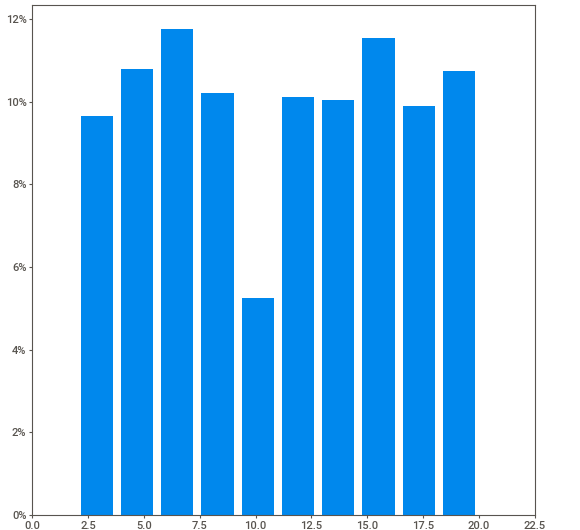
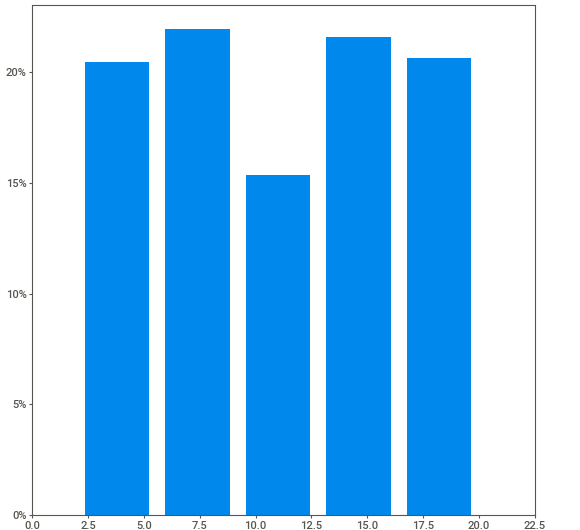
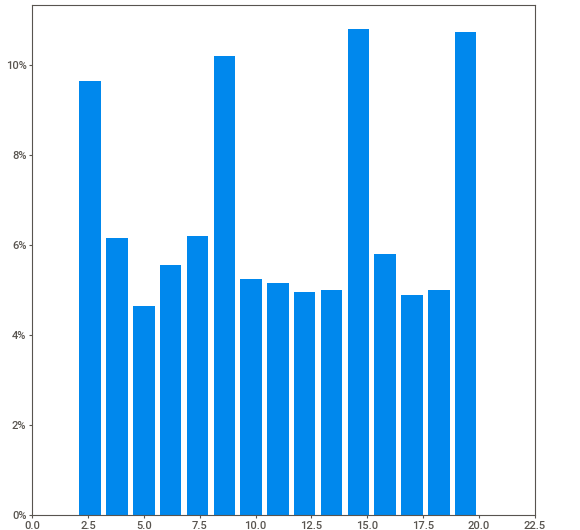
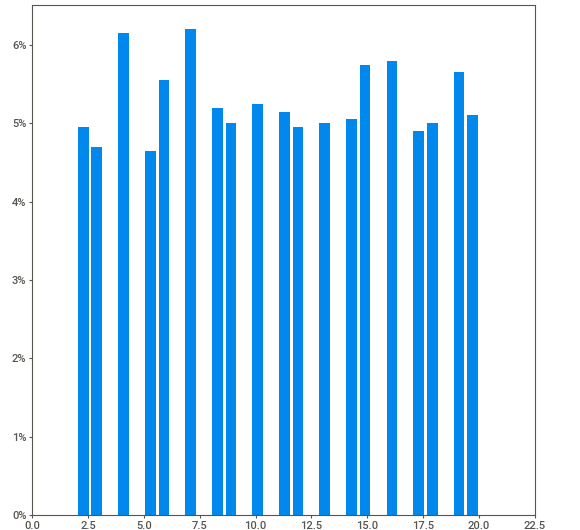
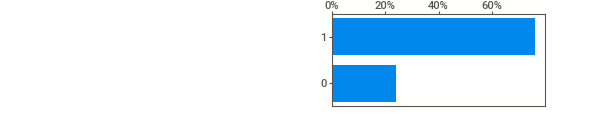
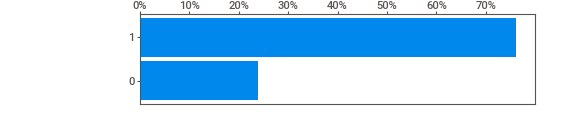
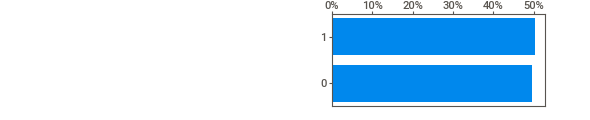
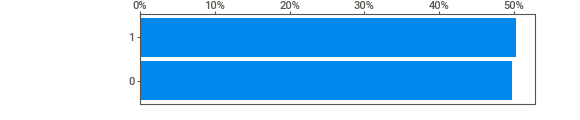
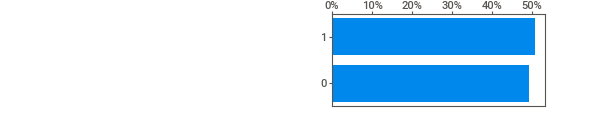
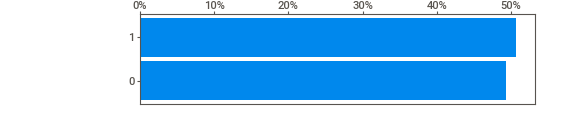
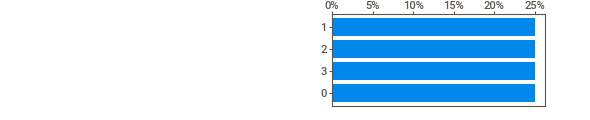
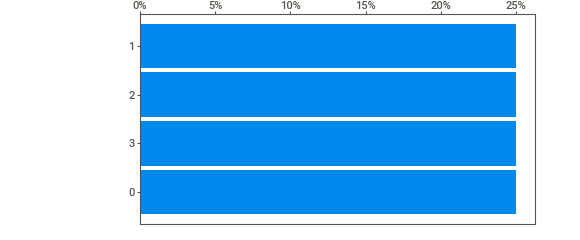
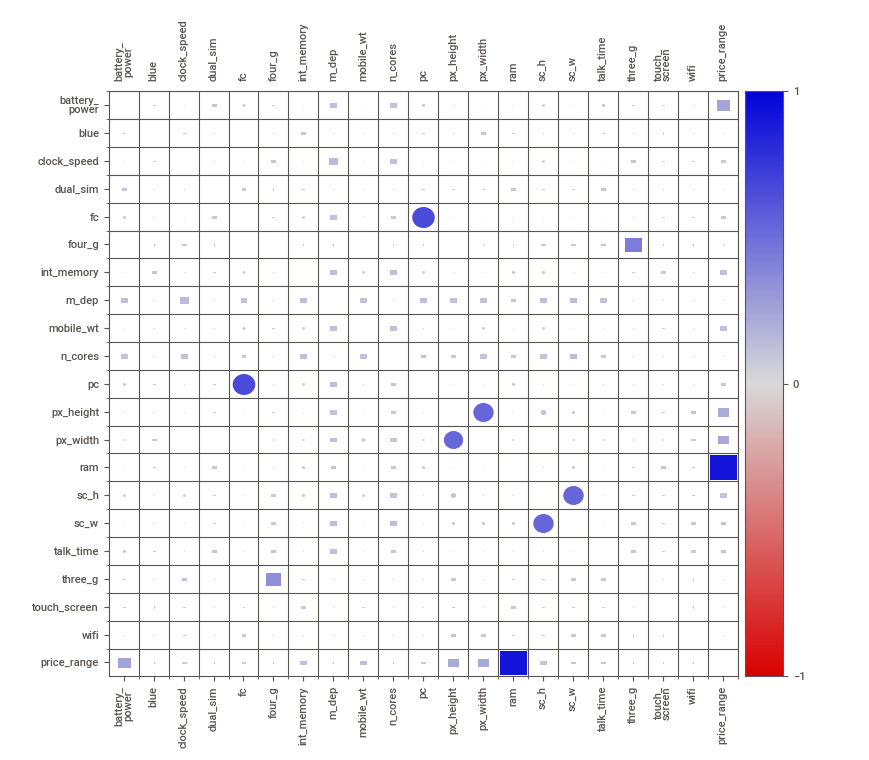
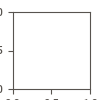

In [ ]:
import IPython
IPython.display.HTML('analyze.html')

Side-by-Side Comparison of Train vs Test Set

 Data Split using 80/20 Split Ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
968            1923     0          0.5         1   7       0          46   
240             633     1          2.2         0   0       1          49   
819            1236     0          0.9         1   2       1          57   
692             781     0          1.1         0   2       0          38   
420            1456     1          0.5         1   7       0           7   
...             ...   ...          ...       ...  ..     ...         ...   
1130           1975     1          1.9         1   2       0          31   
1294            589     1          0.5         0   1       1          59   
860            1829     1          0.5         0   0       1          15   
1459           1927     0          0.9         1   3       0          11   
1126            635     1          0.6         1   1       1          50   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
968     0.5        191        1  10        767      1759  1489    10     9   
240     0.1        139        8   1        529      1009  3560    11     1   
819     0.1        188        1  14        517       809  1406    14    12   
692     0.4        198        5   7        304      1674  3508    13     8   
420     0.4        105        5  12        823      1104  1587     6     5   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1130    0.9        151        1  17        775      1607  3022    13     5   
1294    0.7        146        8   4        759      1858   362    16    10   
860     0.4        160        5   7        729      1267  2080    16    11   
1459    0.4        190        8  12        491      1506  2916    16    11   
1126    0.3         97        5  13        193       989  2107    13    12   

      talk_time  three_g  touch_screen  wifi  
968           3        1             1     1  
240          16        1             1     1  
819          20        1             0     1  
692           5        0             0     1  
420          20        1             0     1  
...         ...      ...           ...   ...  
1130         19        0             0     1  
1294          6        1             1     1  
860          12        1             0     1  
1459         18        0             1     1  
1126         12        1             0     0  

[1600 rows x 20 columns]

In [ ]:
X_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1860           1646     0          2.5         0   3       1          25   
353            1182     0          0.5         0   7       1           8   
1333           1972     0          2.9         0   9       0          14   
905             989     1          2.0         0   4       0          17   
1289            615     1          0.5         1   7       0          58   
...             ...   ...          ...       ...  ..     ...         ...   
965            1379     0          0.5         1   1       0          19   
1284            991     0          2.0         0   2       1          12   
1739           1044     0          1.8         0   4       1          12   
261             728     0          2.7         1   0       0          25   
535            1185     0          1.9         0   0       0          31   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1860    0.6        200        2   5        211      1608   686     8     6   
353     0.5        138        8  16        275       986  2563    19    17   
1333    0.4        196        7  18        293       952  1316     8     1   
905     0.2        166        3  19        256      1394  3892    18     7   
1289    0.5        130        5   8       1021      1958  1906    14     5   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
965     0.3        134        8  17        387       671  3912    11     2   
1284    0.3        158        5   6       1209      1678  2014    11     9   
1739    0.7        104        6   5       1230      1263  1794    18     7   
261     0.2         88        4   1        526      1529  2039     5     1   
535     0.4        152        8   7        837      1642  2447    16     2   

      talk_time  three_g  touch_screen  wifi  
1860         11        1             1     0  
353          19        1             0     0  
1333          8        1             1     0  
905          19        1             1     0  
1289          5        1             0     0  
...         ...      ...           ...   ...  
965          19        0             1     1  
1284         10        1             0     0  
1739         19        1             1     1  
261          12        1             1     1  
535           3        1             1     1  

[400 rows x 20 columns]

Comparison Report

In [ ]:
import sweetviz as sv
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_html('compare.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report compare.html was generated.



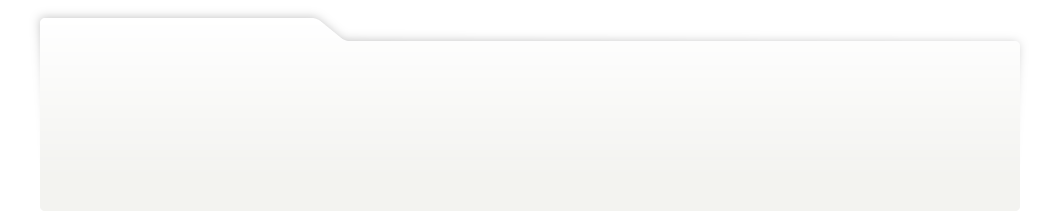
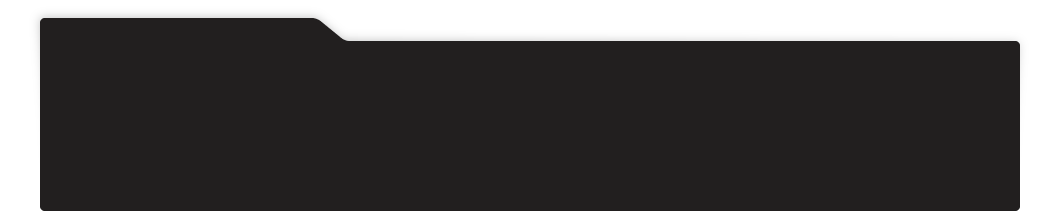
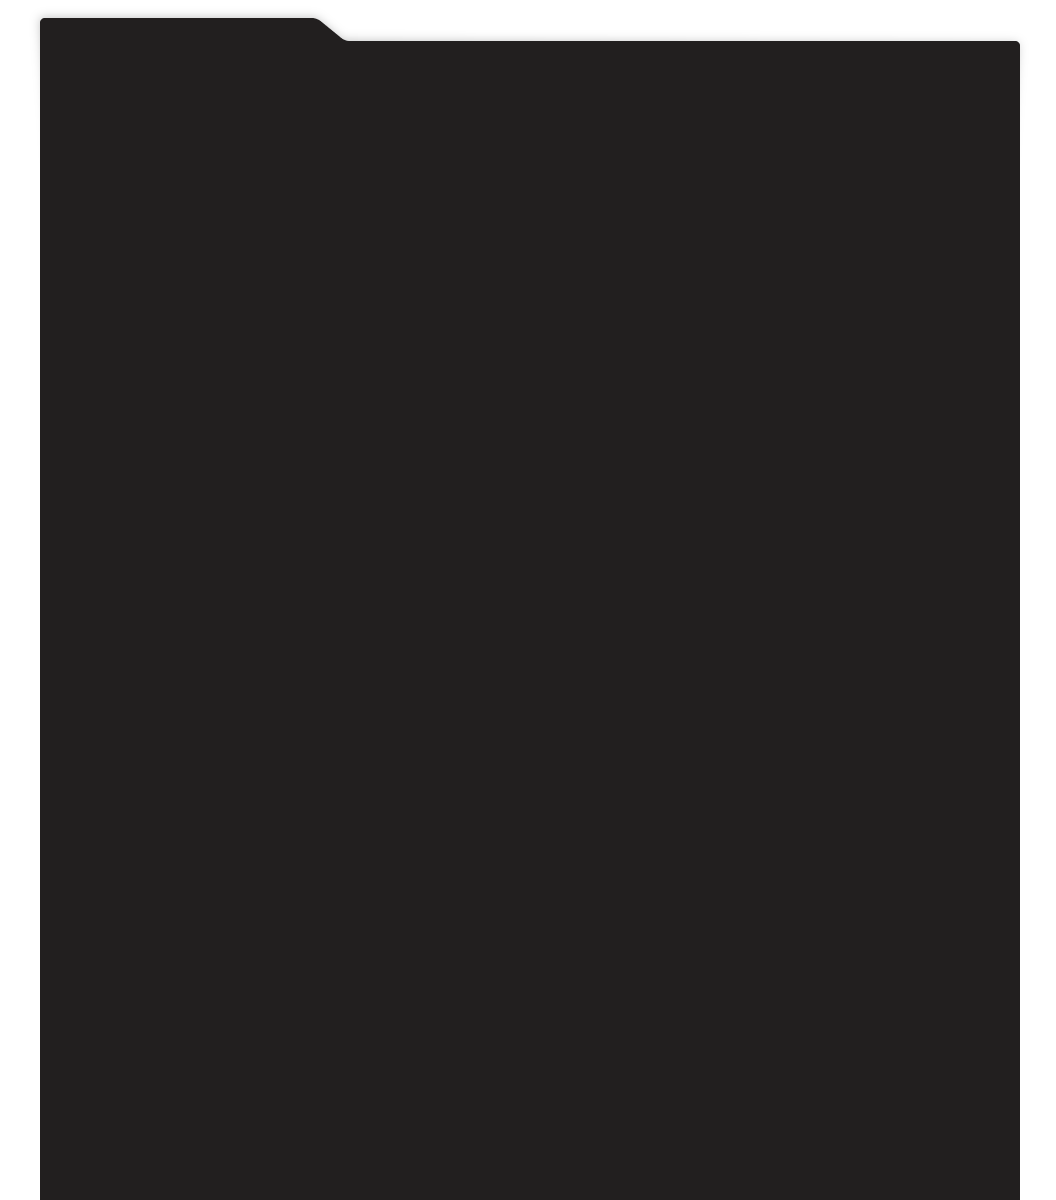
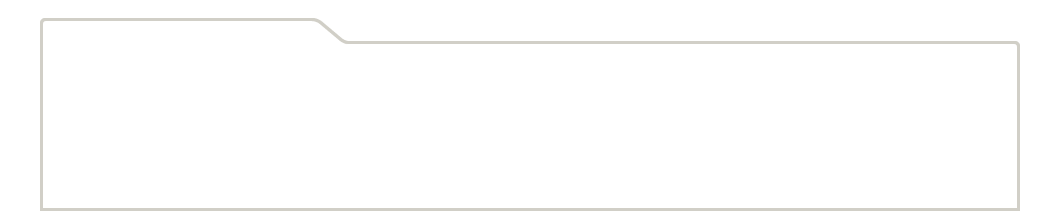
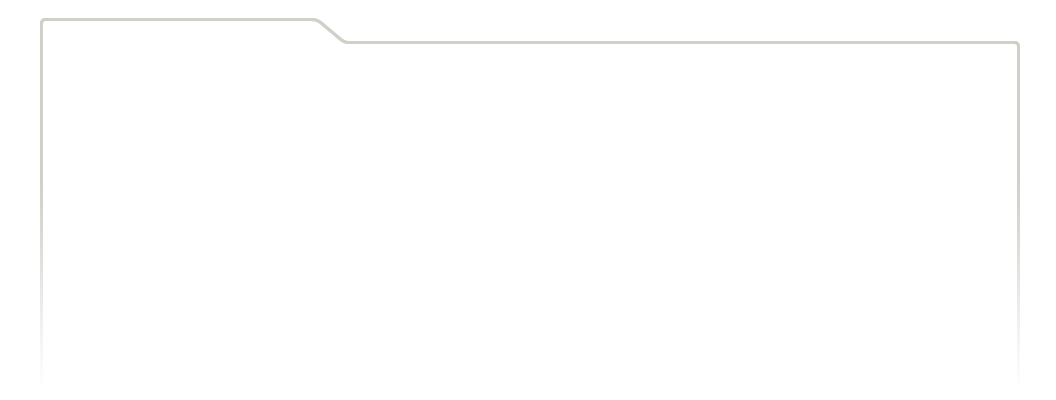
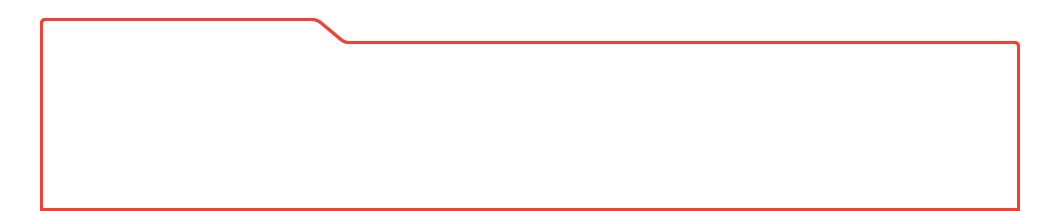
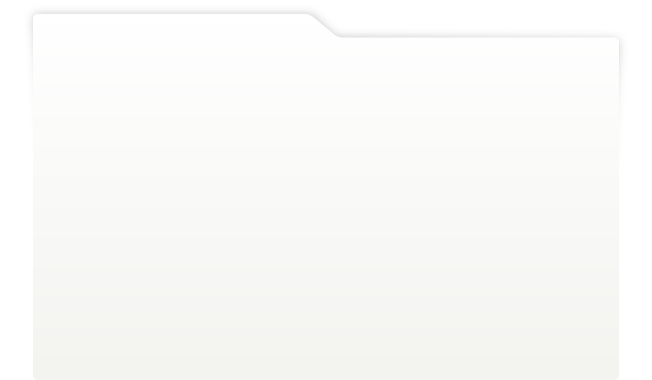
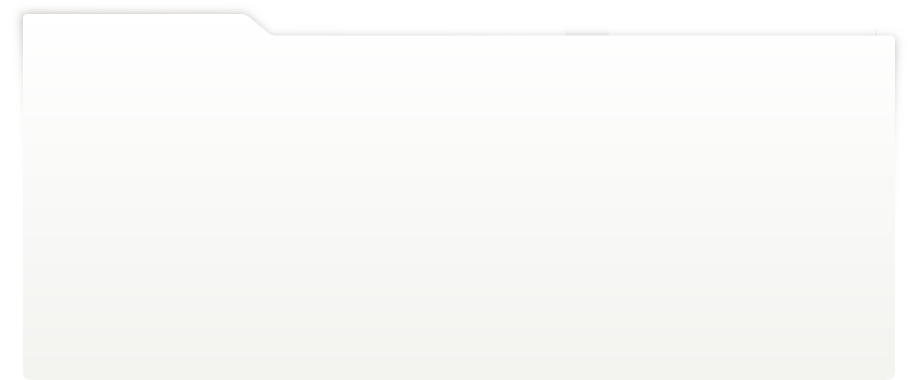
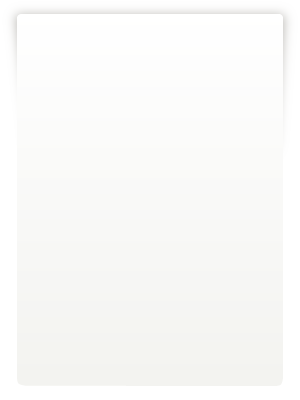
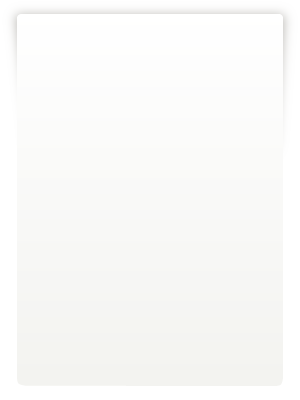
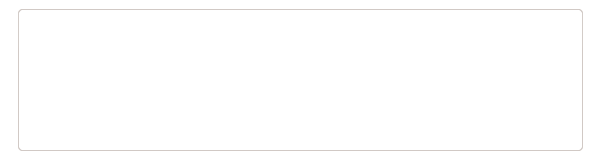
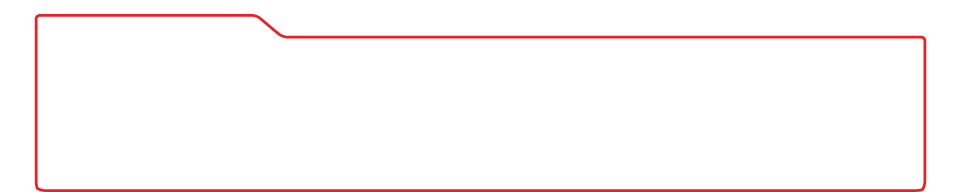
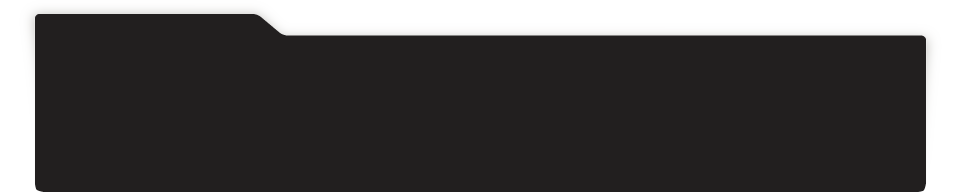
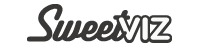
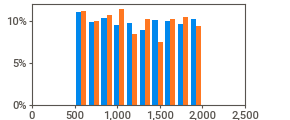
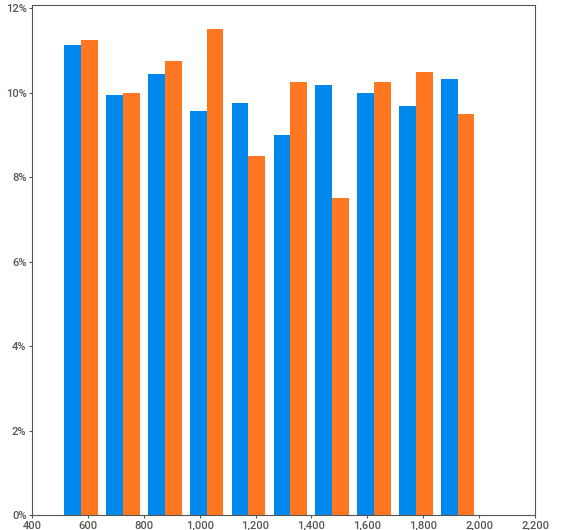
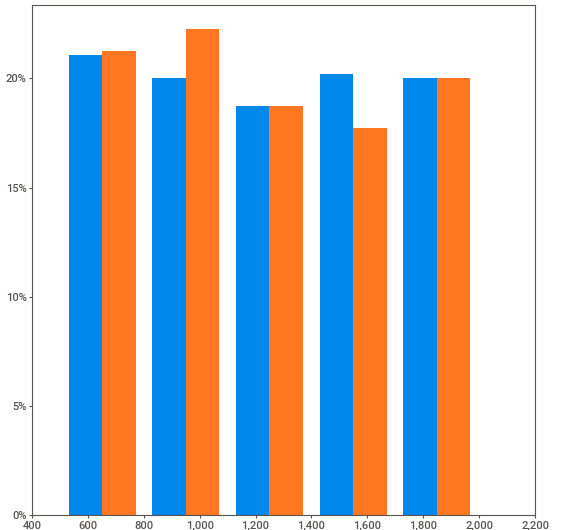
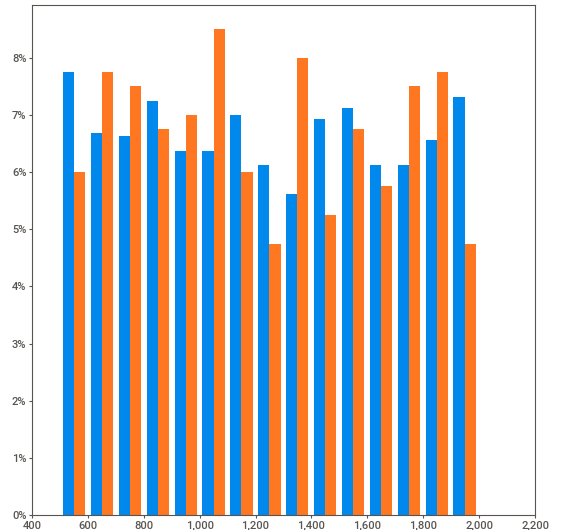
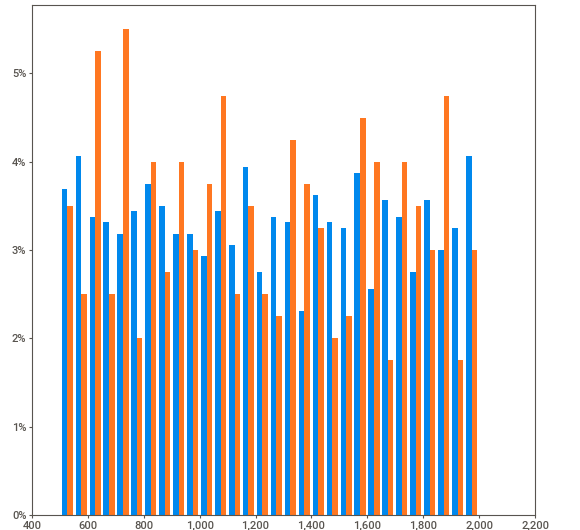
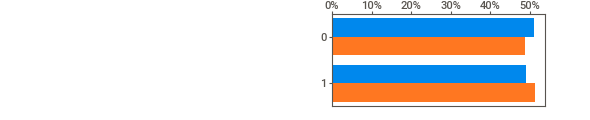
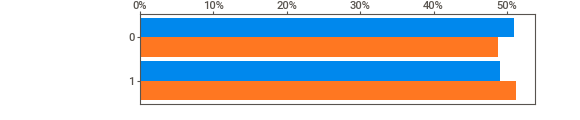
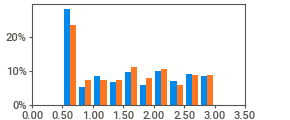
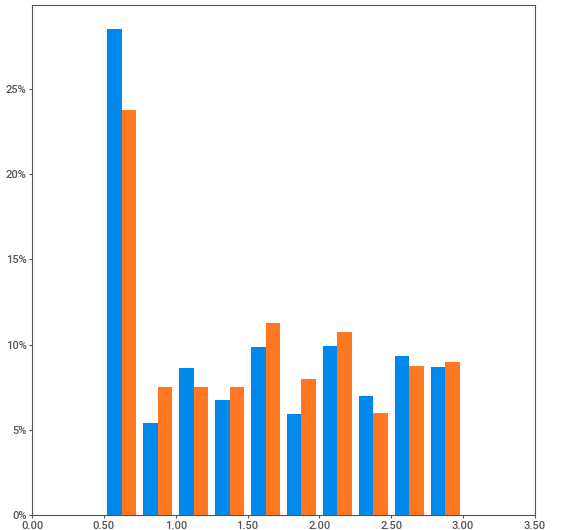
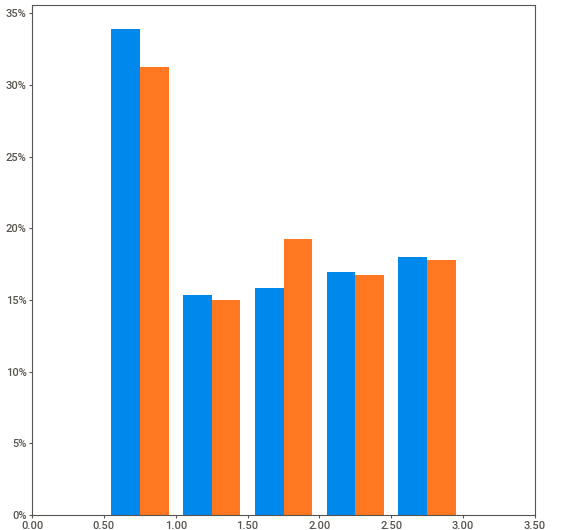
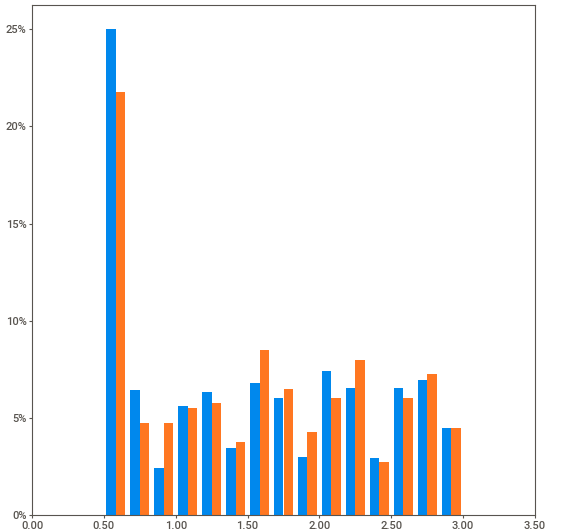
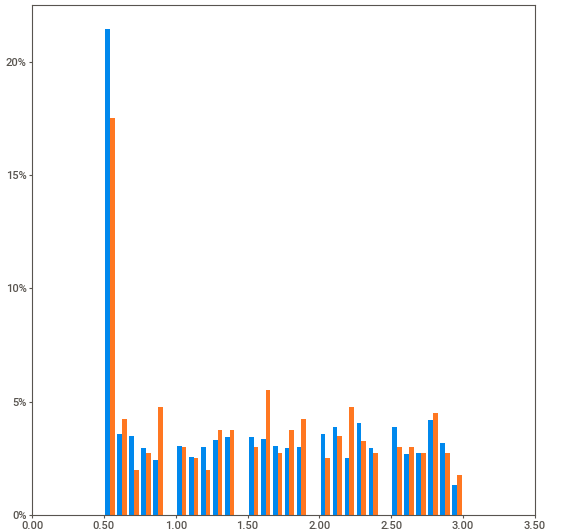
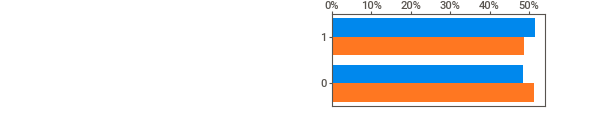
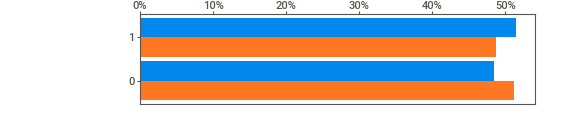
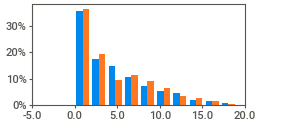
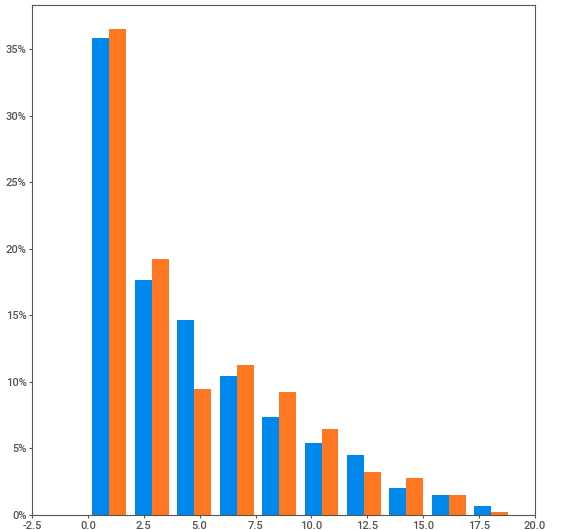
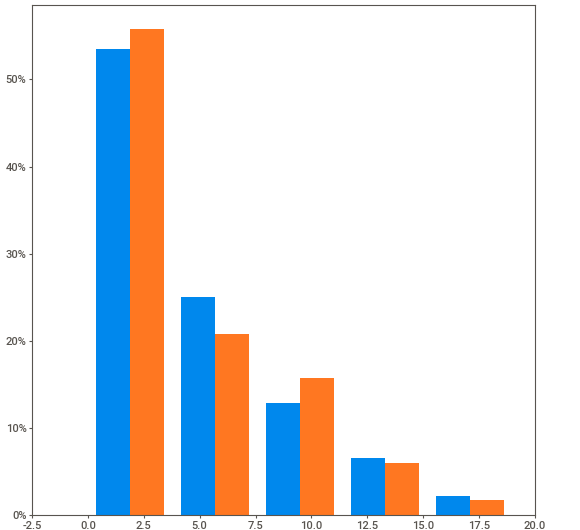
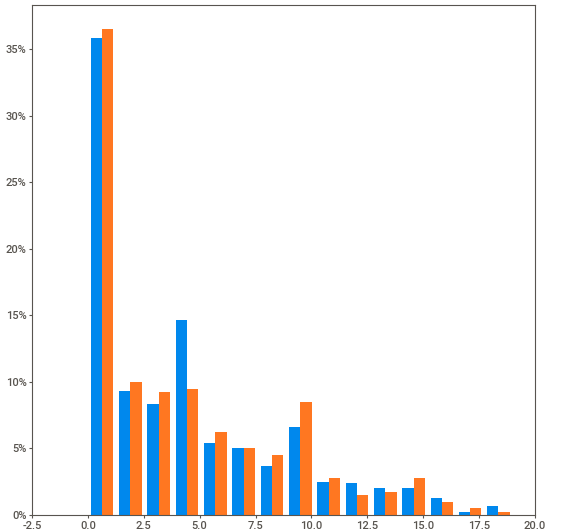
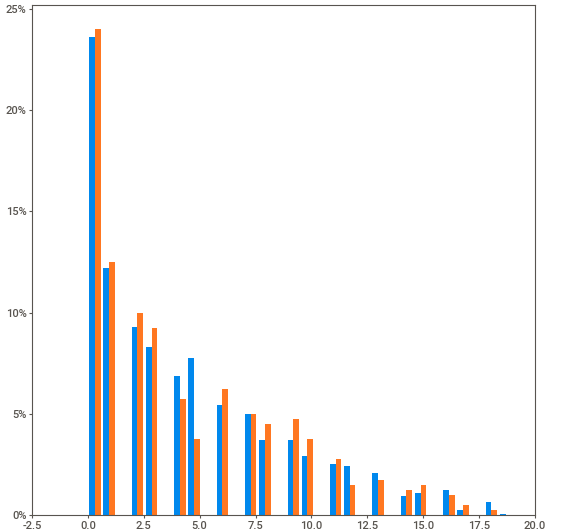
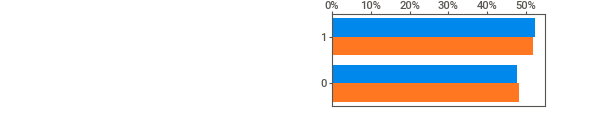
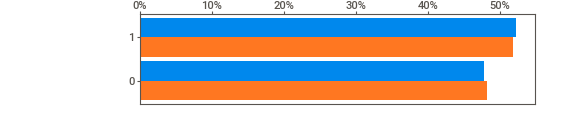
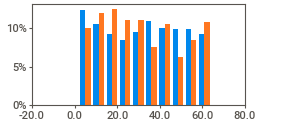
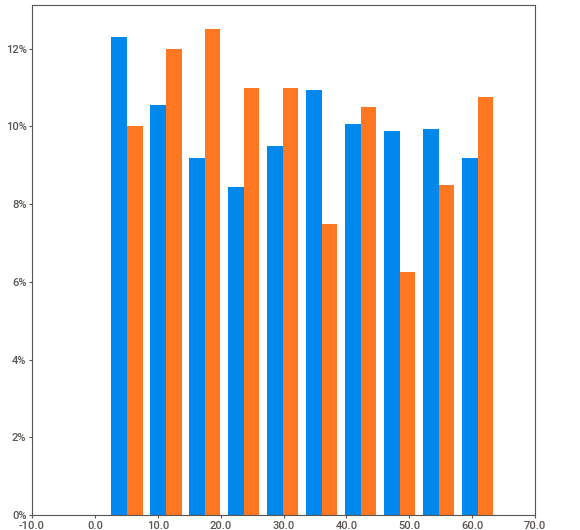
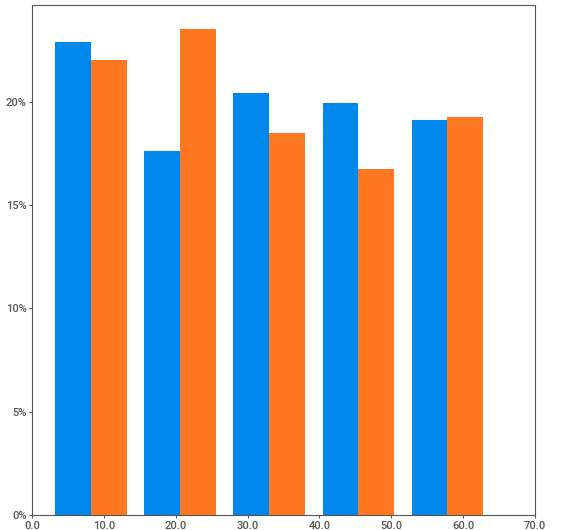
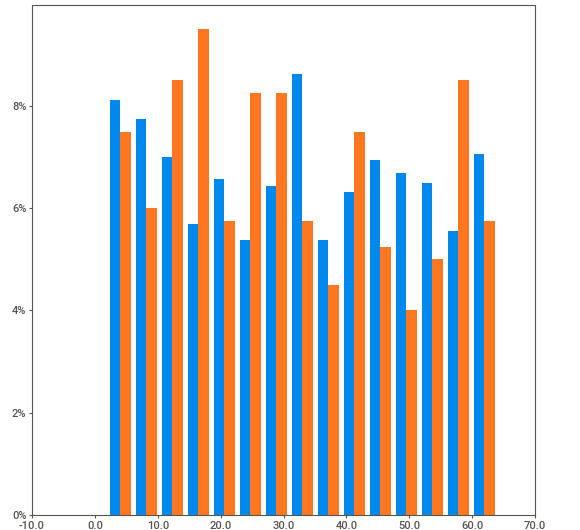
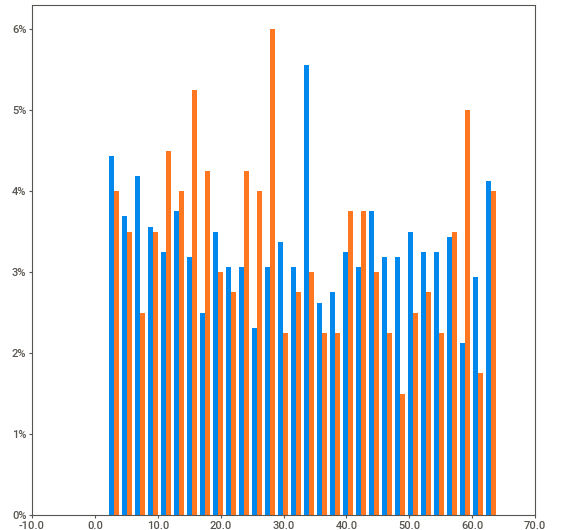
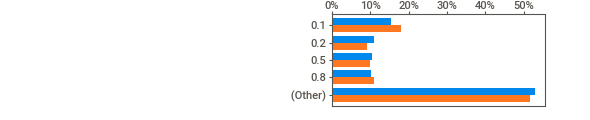
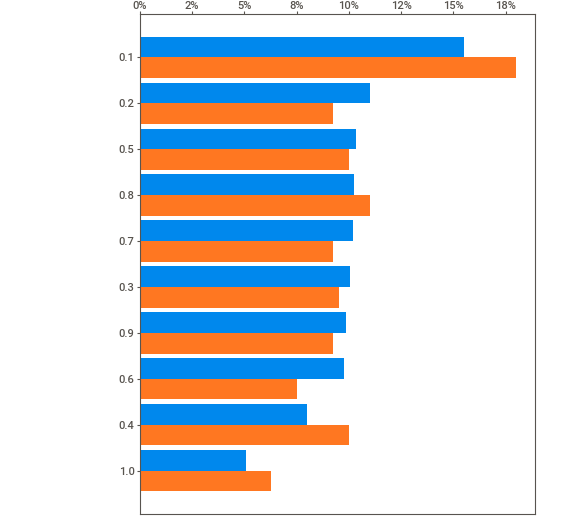
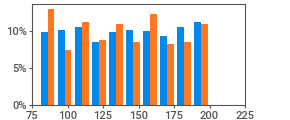
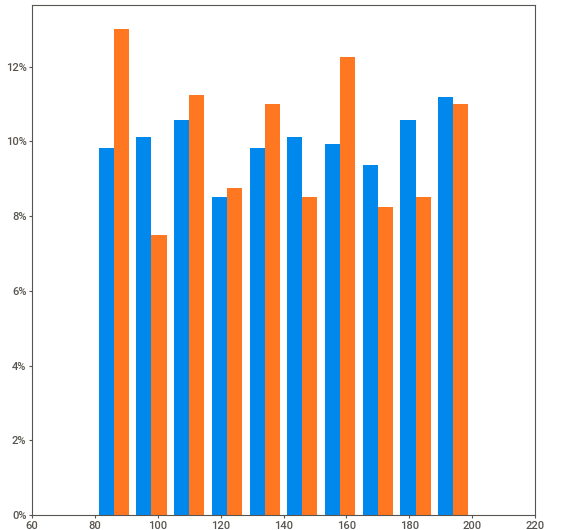
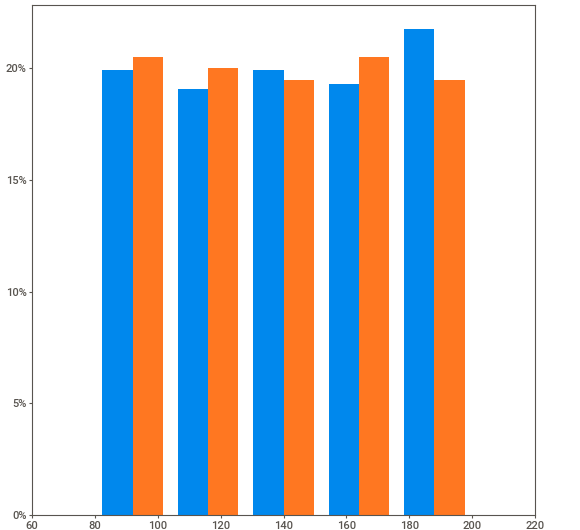
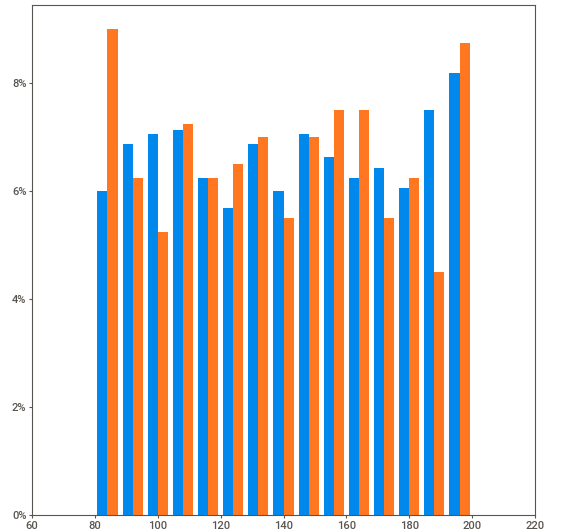
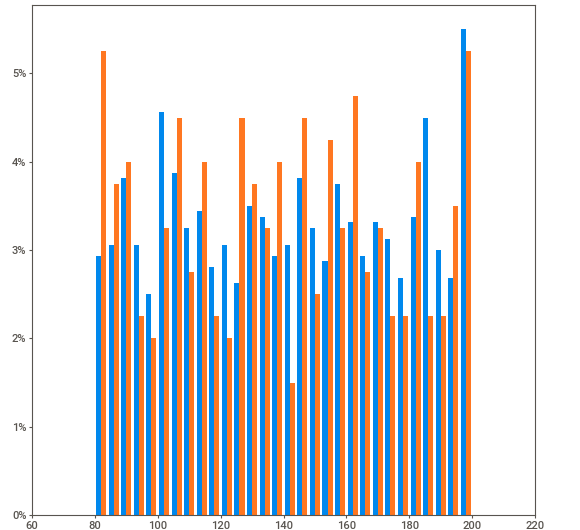
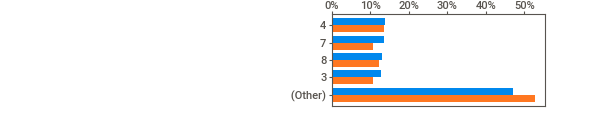
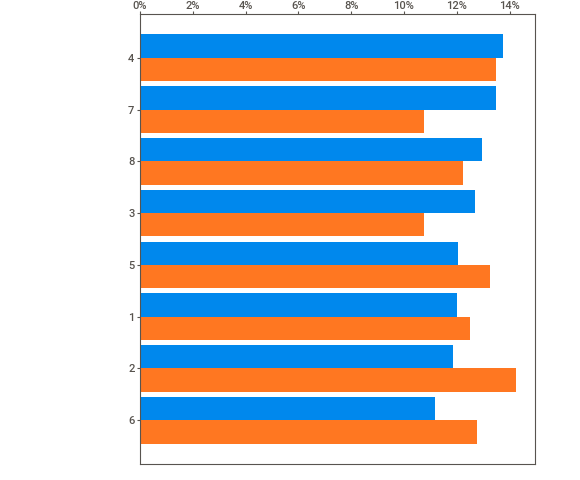
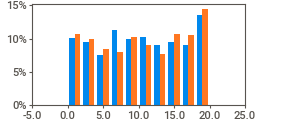
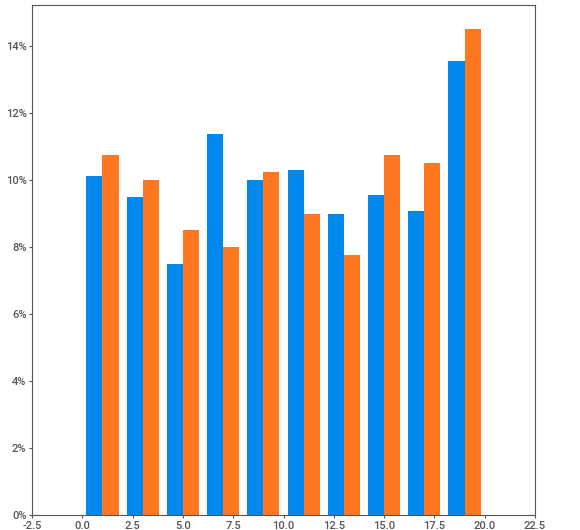
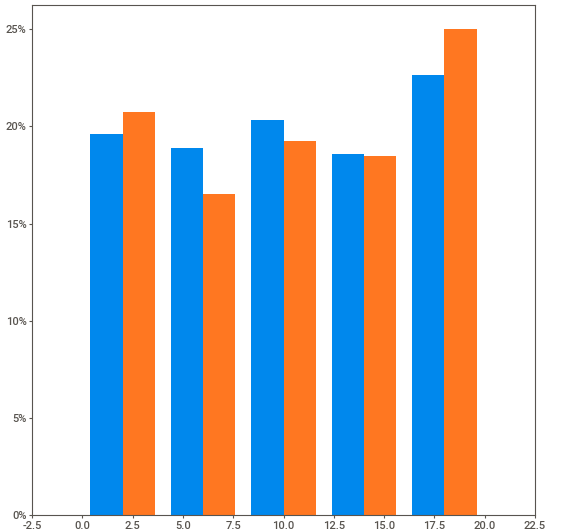
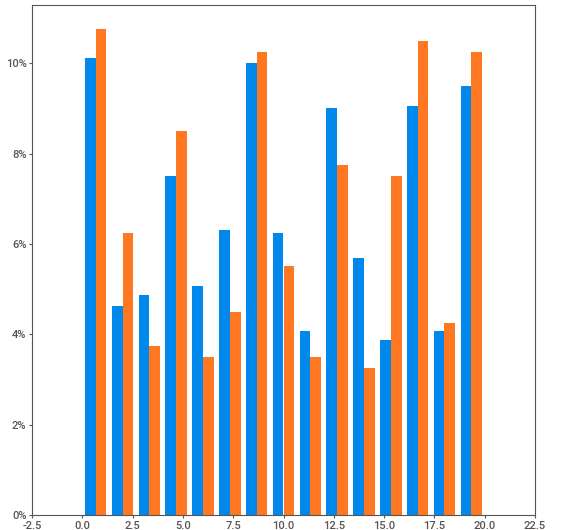
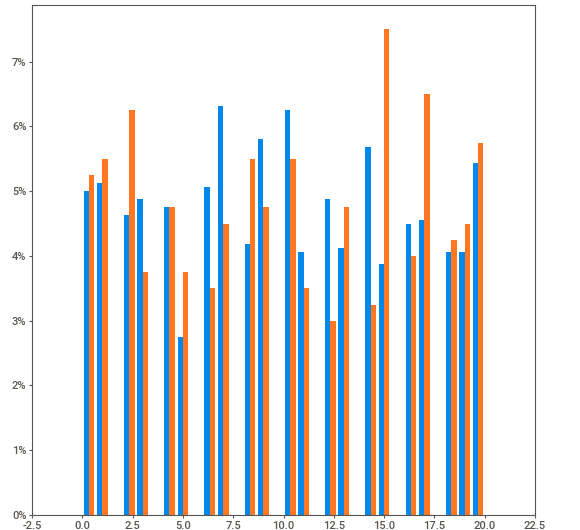
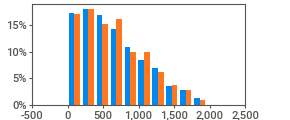
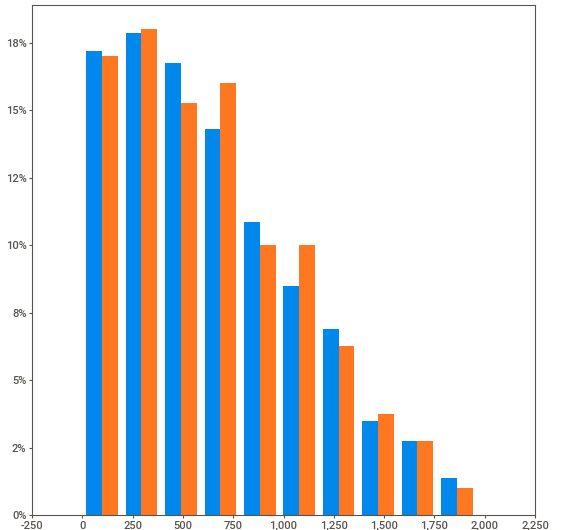
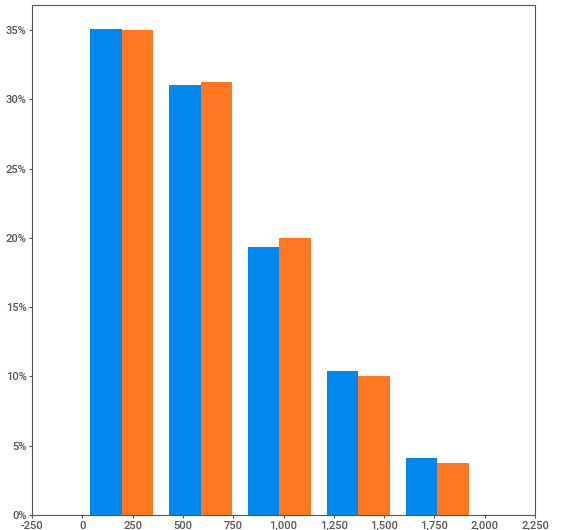
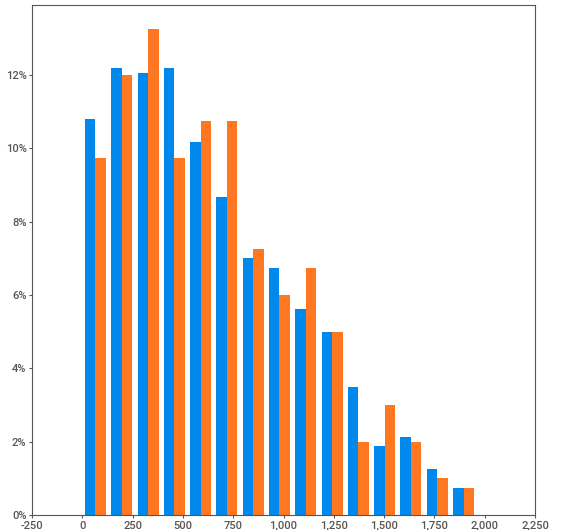
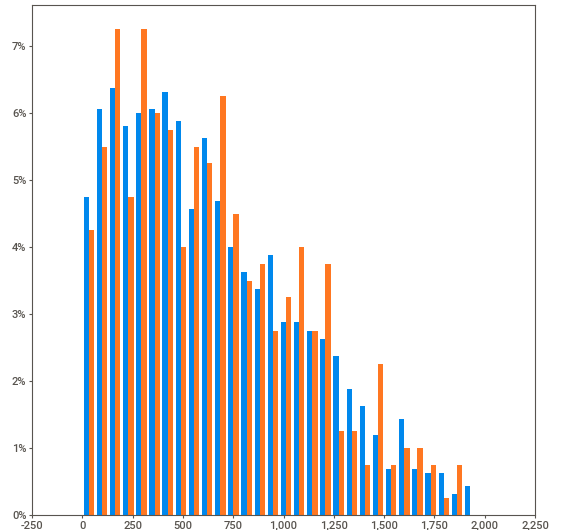
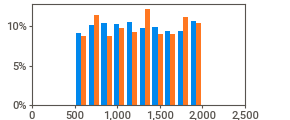
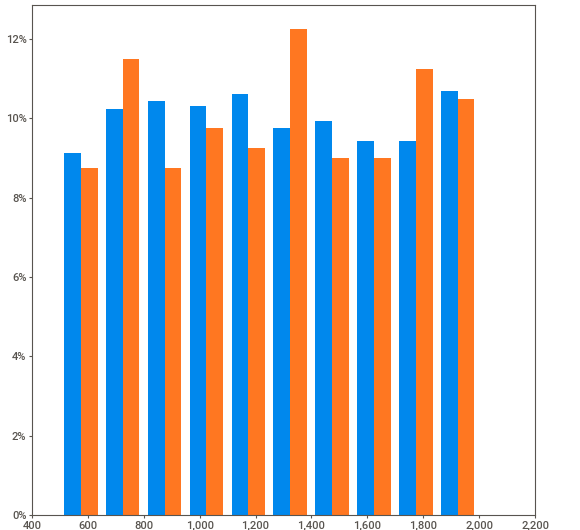
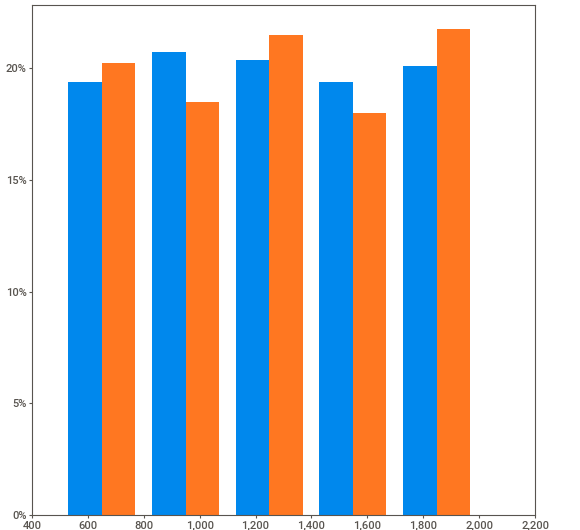
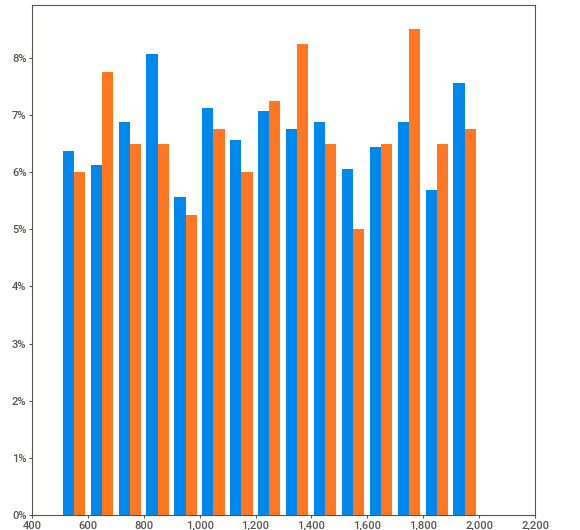
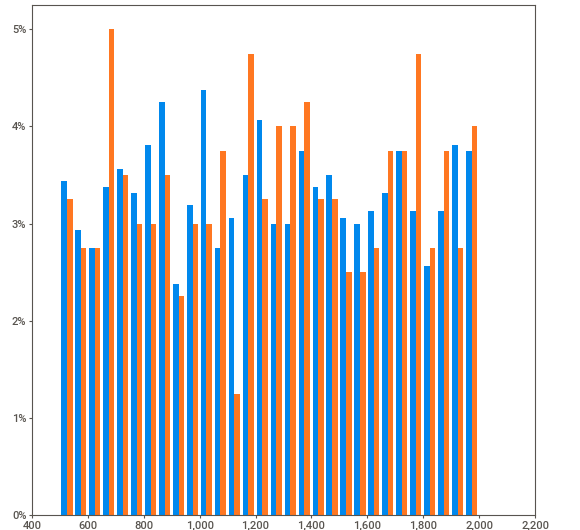
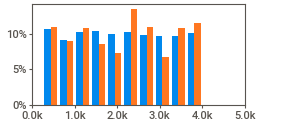
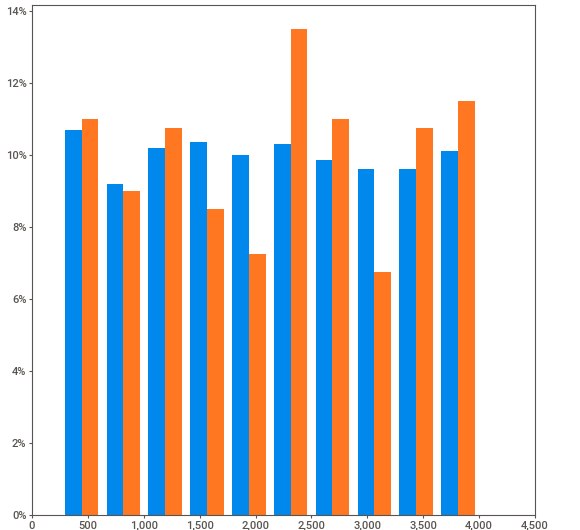
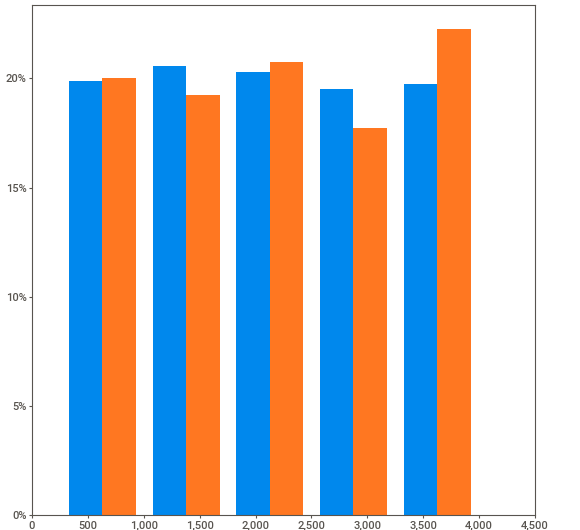
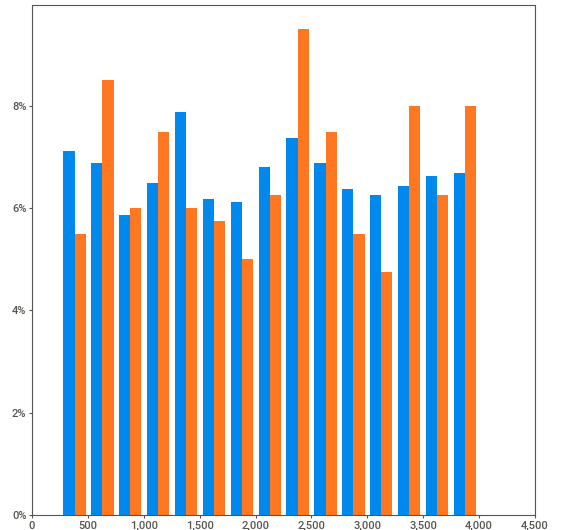
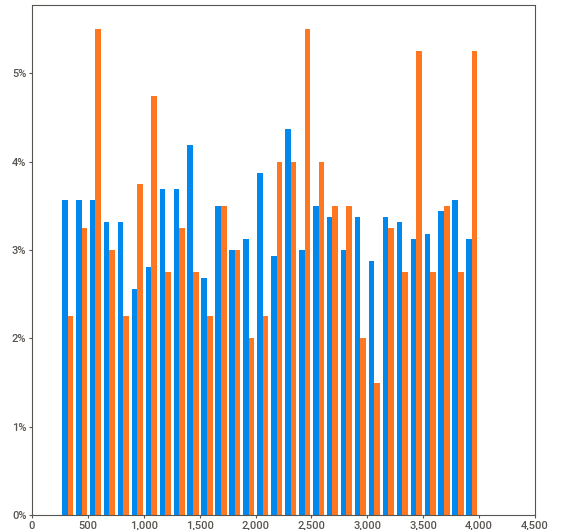
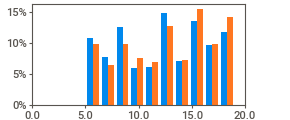
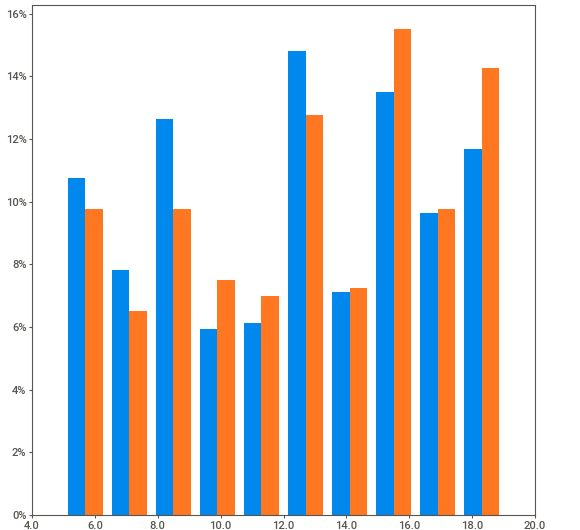
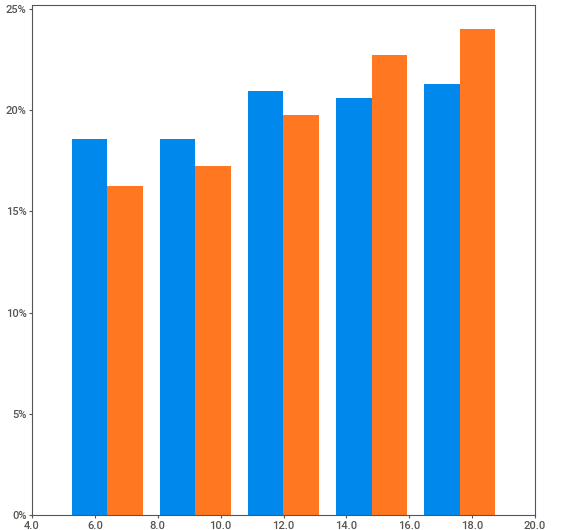
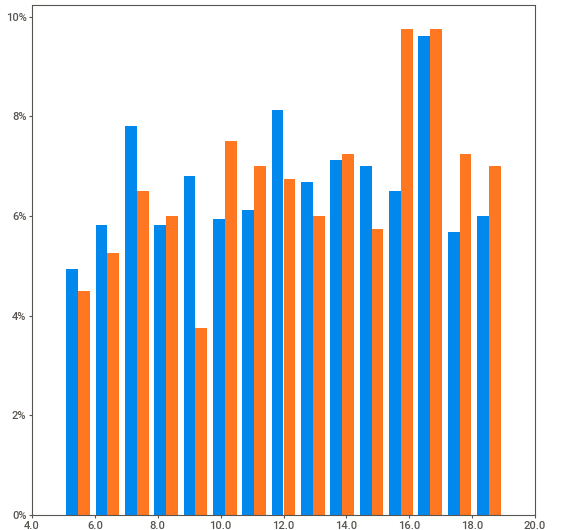
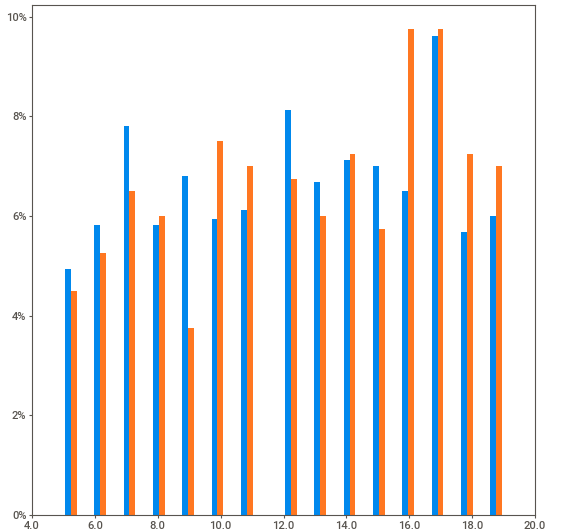
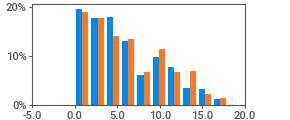
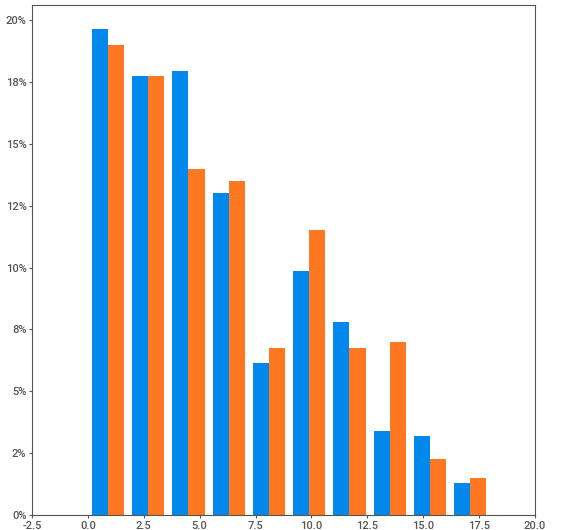
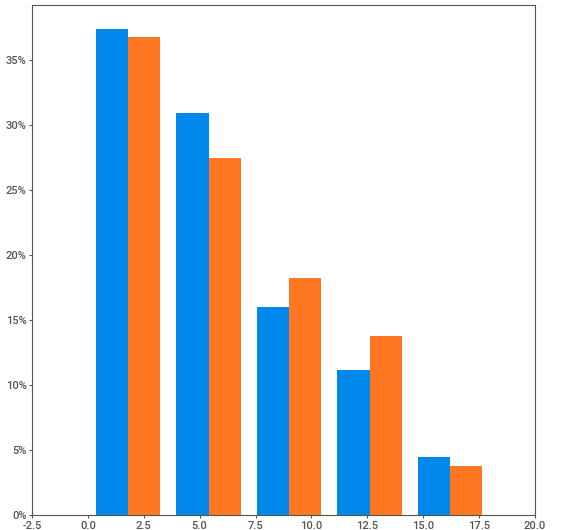
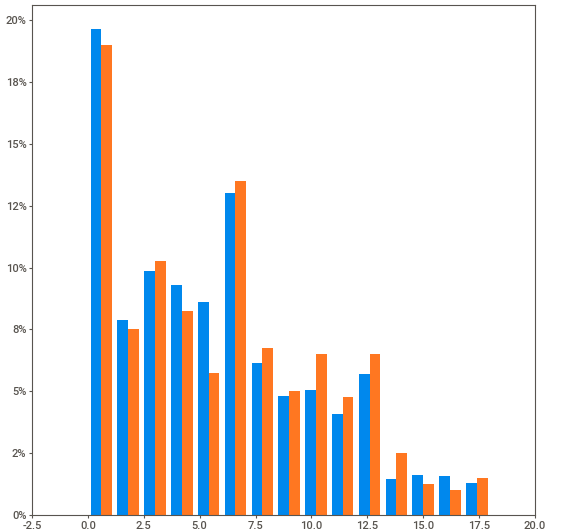
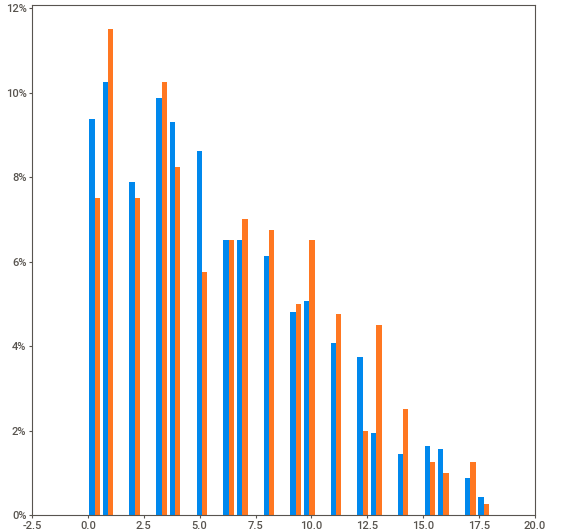
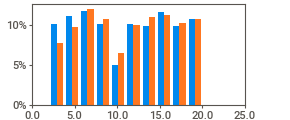
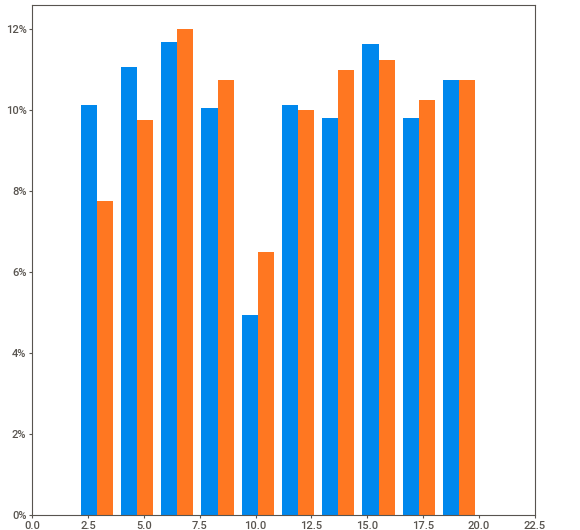
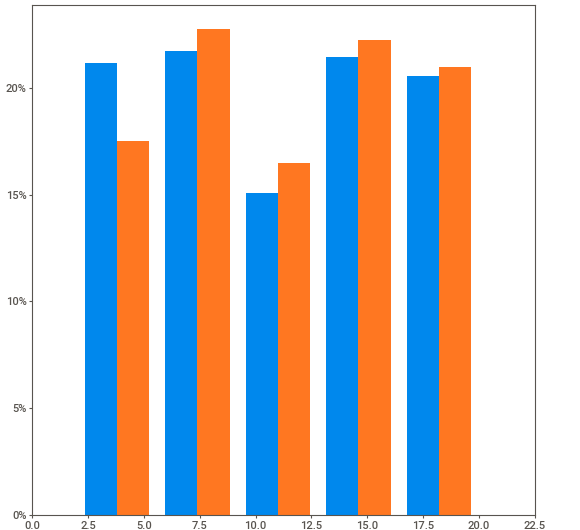
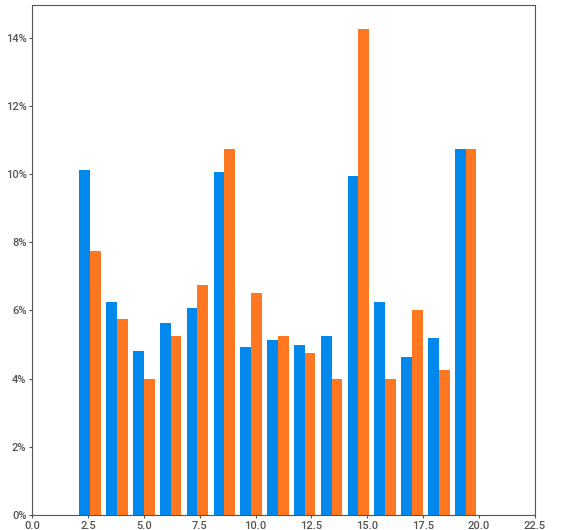
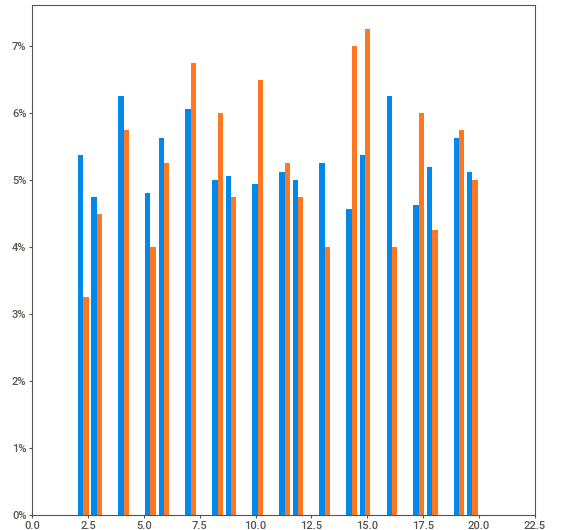
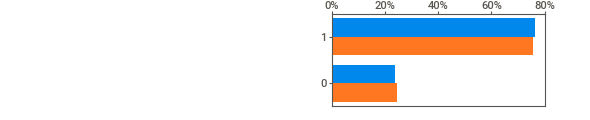
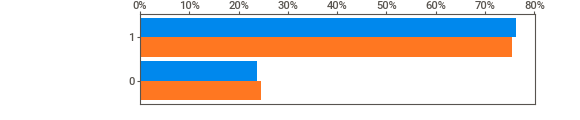
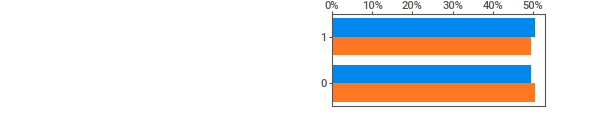
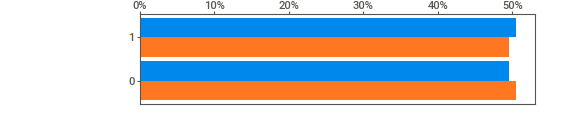
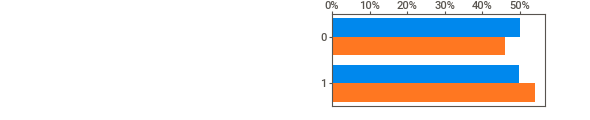
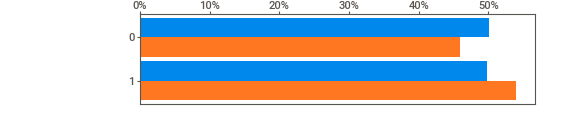
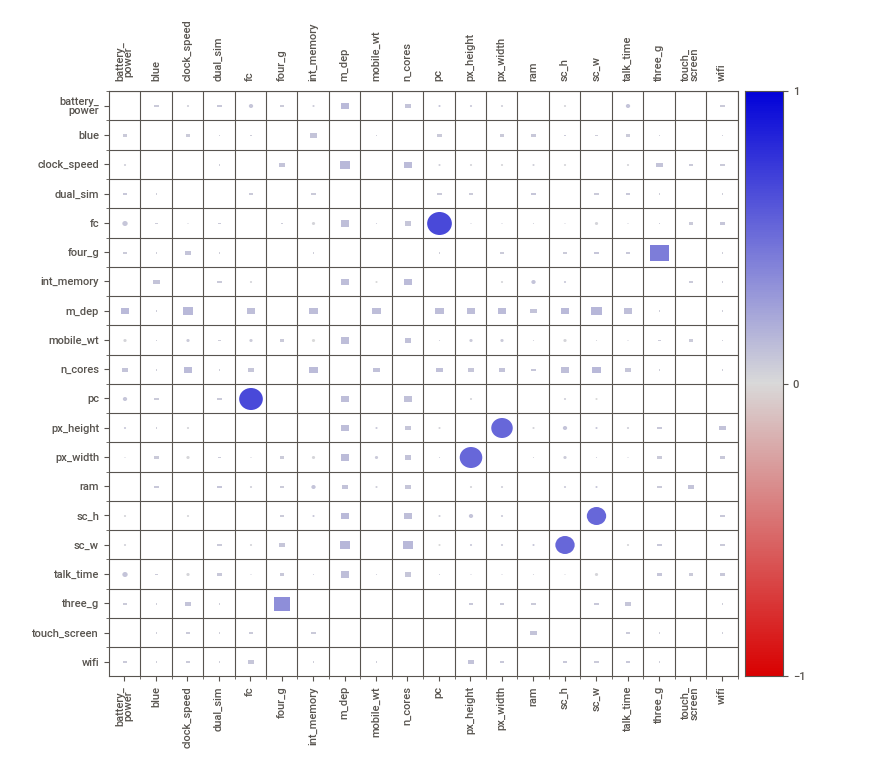
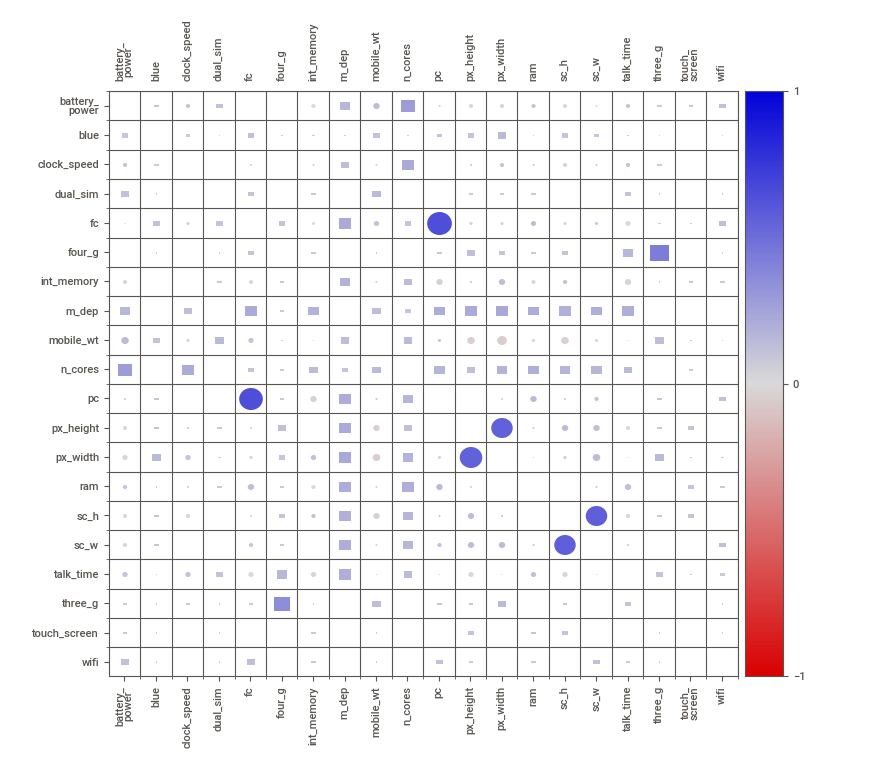

In [ ]:
import IPython
IPython.display.HTML('compare.html')

Feature Importance

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
print(clf.feature_importances_)

[0.074757   0.00665096 0.02772549 0.00697598 0.02516966 0.00676998
 0.0358881  0.02410997 0.04133163 0.02237938 0.02838917 0.05580108
 0.05418135 0.48484184 0.02684186 0.02831856 0.03110753 0.00584461
 0.00670227 0.00621359]


In [ ]:
fi = rf_feat_importance(m, X)
fi[:5]

cols       imp
13            ram  0.487827
0   battery_power  0.074998
11      px_height  0.056359
12       px_width  0.056130
8       mobile_wt  0.038823

from matplotlib import pyplot as plt
_df_0['imp'].plot(kind='hist', bins=20, title='imp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('cols').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['imp'].plot(kind='line', figsize=(8, 4), title='imp')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['cols'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='imp', y='cols', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

We see the most important variable is RAM.

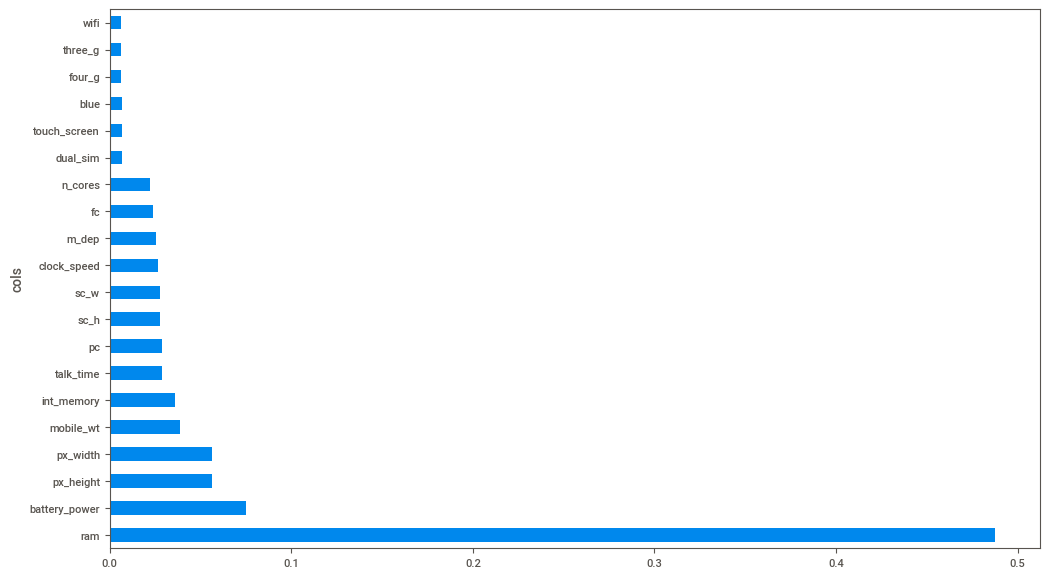

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

Accuracy

In [ ]:
print(clf.score(X_test, y_test))

0.8925


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.88      0.87      0.87        91
           2       0.81      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400

